<a href="https://colab.research.google.com/github/obrunojustino/trabalho_final_mineracao/blob/main/Mineracao_Projeto_Final_Bruno_H_Justino_Victor_8911310_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Final - Mineração de Dados


*   Victor Jose Oliveira **NUSP:8911310** 
*   Bruno Henrique da Silva Justino **NUSP: 11031621**




## Sumário

	* 1 - Formulação do problema.

	* 2 - Pré-processamento dos dados

	* 3 - Análise descritiva.

	* 4 - Aprendizado supervisionado através da validação cruzada (conjunto de teste).

	* 5 - Treinamento do modelo com todos os dados de treinamento.

	* 6 - Predição dos valores no conjunto de teste. 

	* 7 - Avaliação do modelo.

	* 8 - Interpretação dos resultados.
  

# 1 - Formulação do problema:

  Em primeiro lugar, nós usamos como base e origem do dataset, o projeto https://thecleverprogrammer.com/2020/05/22/fifa-analysis-with-data-science/ *FIFA Analysis with Data Science*. Na qual, FIFA 19 é um popular jogo de futebol presente em todas plataformas de games. Nele você pode ser técnico e comandar um time, criar seu personagem para seguir carreira no futebol ou jogar de maneira casual amistosos com amigos.

\

Nesse game, temos dados fidedignos de cada jogador para criar uma atmosfera real e de alta simulação. Desse modo, os principais atributos presentes são as skills de atleta, valores de mercado e perfil pessoal de cada jogador, portanto, podemos tirar conclusões relevantes de algo virtual que reflete bem uma realidade "metrificada". Esses dados são baseados em visualizações humanas empiricas dos jogos de futebol ao redor do mundo, modelos e tecnologia sofisticada, ademais, cada atleta tem um rating, ou seja, uma nota para sua habilidade o que compoe seu qualidade futebolistica.

\

Dessa maneira, com uma gama de variáveis, nós decidimos ***predizer o preço desses jogadores*** e futuramente até comparar o valor real e virtual para efetividade do modelo, pois, o FIFA prioriza caracteristicas do jogador em sí de modo segmentado e bem estruturado. Por outro lado, o mercado além de estudar o atleta e obter essas métricas de avaliação, existe o lado mais mercantil das vendas e menos previsão do preço de um jogador pela volatilidade do mercado/atleta.

\

Lembrando que os dados do FIFA, são ótimos parâmetros para qualquer estudo futebolistico quando olhamos os atributos que são disponibilizados, pois, trata-se de um simulador de futebol com propostas mais do que divertidas.



# 2 - Pré-processamento dos dados:

Nessa etapa vamos sumarizar nossos atributos para adequar ao formato que o modelo aceite, e até, tirar novas variáveis que fazem sentido para encopar um modelo performático

Módulos necessários:

In [ ]:
!pip install pandasql

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFECV
import warnings

warnings.filterwarnings(action='once')
import re

Leitura dos dados:

In [ ]:
!wget "https://thecleverprogrammer.com/wp-content/uploads/2020/05/data.csv"

--2021-12-21 05:51:02--  https://thecleverprogrammer.com/wp-content/uploads/2020/05/data.csv
Resolving thecleverprogrammer.com (thecleverprogrammer.com)... 192.0.78.224, 192.0.78.191
Connecting to thecleverprogrammer.com (thecleverprogrammer.com)|192.0.78.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9140113 (8.7M) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]   8.72M  43.2MB/s    in 0.2s    

2021-12-21 05:51:02 (43.2 MB/s) - ‘data.csv’ saved [9140113/9140113]



In [ ]:
df = pd.read_csv('/content/data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

Caracterização dos dados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Eliminando variáveis desnecessárias, as quais, representam o overall de cada jogador em posições diferentes, logo de times, nome do atleta e id, de maneira geral, todas com alta cardinalidade e com explicabilidades que serão suficientes com as variáveis que veremos a seguir.

In [ ]:
drop_list = [
  "Unnamed: 0", "ID", "Name", "Photo",
  "LS", 
  "ST", 
  "RS", 
  "LW", 
  "LF", 
  "CF", 
  "RF",
  "RW",
  "LAM",
  "CAM",
  "RAM",
  "LM", 
  "LCM",
  "CM",
  "RCM",
  "RM", 
  "LWB",
  "LDM",
  "CDM",
  "RDM",
  "RWB",
  "LB", 
  "LCB",
  "CB", 
  "RCB",
  "RB",
  "Flag", "Club Logo", "Special", "Body Type","Real Face"
]
df.drop(columns=drop_list, inplace=True)

#### Etapa de substituição dos nan's

Usamos o como referência e mais comum na literatura substituir valores faltantes numéricos pela média ou mediana e para textuais comumente usamos a moda. Ademais, isso facilitará a modelagem e pré-processamento nos próximos passos.

In [ ]:
#Contando nulos
df.isnull().sum()

Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl                    48
Acceleration  

In [ ]:
#Substituindo pela média ou moda em alguns casos de strings

# Indicadores de habilidade
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace=True)               
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace=True)           
df['BallControl'].fillna(df['BallControl'].mean(), inplace=True)              
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace=True)        
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace=True)       
df['Agility'].fillna(df['Agility'].mean(), inplace=True)  
df['Reactions'].fillna(df['Reactions'].mean(), inplace=True)    
df['Balance'].fillna(df['Balance'].mean(), inplace=True)   
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace=True)    
df['Jumping'].fillna(df['Jumping'].mean(), inplace=True)    
df['Stamina'].fillna(df['Stamina'].mean(), inplace=True)   
df['Strength'].fillna(df['Strength'].mean(), inplace=True)   
df['LongShots'].fillna(df['LongShots'].mean(), inplace=True)   
df['Aggression'].fillna(df['Aggression'].mean(), inplace=True)      
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace=True)         
df['Positioning'].fillna(df['Positioning'].mean(), inplace=True)       
df['Vision'].fillna(df['Vision'].mean(), inplace=True)  
df['Penalties'].fillna(df['Penalties'].mean(), inplace=True)     
df['Composure'].fillna(df['Composure'].mean(), inplace=True)     
df['Marking'].fillna(df['Marking'].mean(), inplace=True)   
df['StandingTackle'].fillna(df['StandingTackle'] .mean(), inplace=True)          
df['SlidingTackle'].fillna(df['SlidingTackle']   .mean(), inplace=True)         
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace=True)   
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace=True)      
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace=True)     
df['GKPositioning'].fillna(df['GKPositioning']   .mean(), inplace=True)         
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace=True)    

# Indiadores físicos
df['Weight'].fillna('200lbs', inplace = True)
df['Height'].fillna("5'11", inplace = True)

df['Contract Valid Until'].fillna(2019, inplace = True) #Moda
#df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True) #Moda

df['Jersey Number'].fillna(8, inplace = True)
df['Position'].fillna('ST', inplace = True) # Moda
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [ ]:
#Contando nulos
df.isnull().sum()

Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Position                        0
Jersey Number                   0
Joined                          0
Loaned From                 16943
Contract Valid Until            0
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling                       0
Curve                           0
FKAccuracy                      0
LongPassing                     0
BallControl                     0
Acceleration  

#### Variável 'Loaned from'(emprestado de)

A coluna "Loaned from" (emprestado de) mostra de qual time o jogador foi emprestado, nos casos em que ele foi emprestado. É mais importante saber se foi ou não emprestado do que saber de qual time veio, pois o ato de emprestar significa uma nova chance para o atleta se desenvolver mais no novo time ou decair de nível e o que importa é a dinâmica de um time para o outro. Ademais, por se tratar de uma variável com alta cardinalidade e com poucas ocorrências, seria difícil clusterizar para a boa performance de nosso modelo.

In [ ]:
df["Loaned From"].loc[~df["Loaned From"].isnull()] = 1
df["Loaned From"].loc[df["Loaned From"].isnull()] = 0
df.rename(columns={"Loaned From": "Loaned"}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Variável 'Joined' and 'Contract Valid Until'(datas de início e idade do contrato)

Dicionários auxiliareas para a manipulação das colunas de data:

In [ ]:
month_dict = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
  "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}
day_dict = {"1": "01", "2": "02", "3": "03", "4": "04", "5": "05", "6": "06", "7": "07", 
  "8": "08", "9": "09"}

Colunas com o ano, o mês e o dia de encerramento de contrato do jogador (e tratamentos dessas colunas):

In [ ]:
df[["Contract Valid Until - M", "Contract Valid Until - D", "Contract Valid Until - Y"]] = df["Contract Valid Until"].str.split(" ", expand=True)
years_str_range = ["2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025", "2026"]
for str_year in years_str_range:
  df["Contract Valid Until - Y"].loc[df["Contract Valid Until - M"] == str_year] = str_year
  df["Contract Valid Until - M"].loc[df["Contract Valid Until - M"] == str_year] = None

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Tratamento da coluna do mês do enc. do contrato - formatando para MM:

In [ ]:
for month in month_dict:
  df["Contract Valid Until - M"].loc[df["Contract Valid Until - M"] == month] = month_dict[month]

df["Contract Valid Until - M"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array([None, '06', '12', nan, '05', '01', '10', '11', '02'], dtype=object)

Tratamento da coluna do dia do enc. do contrato - formatando para DD:

In [ ]:
df["Contract Valid Until - D"] = df["Contract Valid Until - D"].str.slice(start=0, stop=-1)

for day in day_dict:
  df["Contract Valid Until - D"].loc[df["Contract Valid Until - D"] == day] = day_dict[day]

df["Contract Valid Until - D"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array([None, '30', '31', nan, '01', '04', '07', '02', '06', '14', '03',
       '12', '25', '18', '27', '05', '15', '11', '20'], dtype=object)

In [ ]:
df["Contract Valid Until - M"] = df["Contract Valid Until - M"].fillna(value="12")
df["Contract Valid Until - D"] = df["Contract Valid Until - D"].fillna(value="31")

Concatenando colunas de ano, mês e dia da validade do contrato:

In [ ]:
df["Contract Valid Until"] = df[
                                "Contract Valid Until - Y"
                                ] + "-" + df[
                                            "Contract Valid Until - M"
                                            ] + "-" + df[
                                                         "Contract Valid Until - D"
                                                        ]
df["Contract Valid Until"]

0        2021-12-31
1        2022-12-31
2        2022-12-31
3        2020-12-31
4        2023-12-31
            ...    
18202    2019-12-31
18203    2020-12-31
18204    2021-12-31
18205    2019-12-31
18206    2019-12-31
Name: Contract Valid Until, Length: 18207, dtype: object

Quantidade de nulos da coluna de encerramento de contrato:

In [ ]:
df["Contract Valid Until"].isnull().sum()

289

In [ ]:
df["Contract Valid Until"].fillna("2019-12-31", inplace=True)

In [ ]:
df["Contract Valid Until"].isnull().sum()

0

Convertendo a mesma coluna para o formato datetime:

In [ ]:
df["Contract Valid Until"] = pd.to_datetime(df["Contract Valid Until"])
df["Contract Valid Until"]

0       2021-12-31
1       2022-12-31
2       2022-12-31
3       2020-12-31
4       2023-12-31
           ...    
18202   2019-12-31
18203   2020-12-31
18204   2021-12-31
18205   2019-12-31
18206   2019-12-31
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

Agora, vamos fazer uma padronização inicial na coluna "Joined", para que depois possamos tranformá-la no formato datetime:

In [ ]:
year_joined = []
for year in range(1950, 2027):
  year_joined += [str(year)]

for year in year_joined:
  df["Joined"].loc[df["Joined"] == year] = "Dec 31, " + year

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df[["Joined - M", "Joined - D", "Joined - Y"]] = df["Joined"].str.split(" ", expand=True)
df[["Joined - M", "Joined - D", "Joined - Y"]]

,Joined - M,Joined - D,Joined - Y
0,Jul,"1,",2004
1,Jul,"10,",2018
2,Aug,"3,",2017
3,Jul,"1,",2011
4,Aug,"30,",2015
...,...,...,...
18202,May,"3,",2017
18203,Mar,"19,",2018
18204,Jul,"1,",2017
18205,Apr,"24,",2018


In [ ]:
for month in month_dict:
  df["Joined - M"].loc[df["Joined - M"] == month] = month_dict[month]

df["Joined - M"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array(['07', '08', '09', '01', '02', '03', '06', '12', '10', '05', '04',
       '11'], dtype=object)

In [ ]:
df["Joined - D"] = df["Joined - D"].str.slice(start=0, stop=-1)

for day in day_dict:
  df["Joined - D"].loc[df["Joined - D"] == day] = day_dict[day]

df["Joined - D"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array(['01', '10', '03', '30', '11', '16', '17', '04', '14', '28', '09',
       '06', '31', '02', '12', '27', '18', '21', '24', '08', '26', '07',
       '19', '05', '20', '22', '23', '13', '15', '25', '29'], dtype=object)

In [ ]:
df["Joined"] = df[
               "Joined - Y"
               ] + "-" + df[
                        "Joined - M"
                        ] + "-" + df[
                                  "Joined - D"
                                  ]
df["Joined"]

0        2004-07-01
1        2018-07-10
2        2017-08-03
3        2011-07-01
4        2015-08-30
            ...    
18202    2017-05-03
18203    2018-03-19
18204    2017-07-01
18205    2018-04-24
18206    2018-10-30
Name: Joined, Length: 18207, dtype: object

In [ ]:
df["Joined"] = pd.to_datetime(df["Joined"])
df["Joined"]

0       2004-07-01
1       2018-07-10
2       2017-08-03
3       2011-07-01
4       2015-08-30
           ...    
18202   2017-05-03
18203   2018-03-19
18204   2017-07-01
18205   2018-04-24
18206   2018-10-30
Name: Joined, Length: 18207, dtype: datetime64[ns]

In [ ]:
df["Contract Duration (Months)"] = df["Contract Valid Until"] - df["Joined"]
df["Contract Duration (Months)"] = df[
  "Contract Duration (Months)"
].astype(dtype=str).str.extract(
  r"([0-9]+\.[0-9]+|[0-9]+\,[0-9]|[0-9]+)"
).astype(dtype=float)/30
df["Contract Duration (Months)"]

0        213.066667
1         54.500000
2         65.866667
3        115.700000
4        101.500000
            ...    
18202     32.400000
18203     33.933333
18204     54.800000
18205     20.533333
18206     14.233333
Name: Contract Duration (Months), Length: 18207, dtype: float64

Eliminando algumas colunas auxiliares criadas e as colunas "Joined" e "Contract Valid Until":

In [ ]:
df.drop(
  columns=[
    "Contract Valid Until",
    "Contract Valid Until - M", 
    "Contract Valid Until - D", 
    "Contract Valid Until - Y",
    "Joined", 
    "Joined - M", 
    "Joined - D", 
    "Joined - Y"
  ],
  inplace=True
)

Análise descritiva da variável "Contract Duration (Months)":

In [ ]:
df["Contract Duration (Months)"].describe()

count    18207.000000
mean        49.675281
std         30.165467
min          1.266667
25%         30.366667
50%         42.633333
75%         64.933333
max        372.366667
Name: Contract Duration (Months), dtype: float64

Jogadores com maior tempo de contrato (>= 20 anos):

In [ ]:
df.loc[df["Contract Duration (Months)"] >= 240]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Loaned,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Duration (Months)
541,32,Russia,80,80,PFC CSKA Moscow,€8.5M,€1K,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,0,6'1,172lbs,19.0,13.0,18.0,23.0,10.0,15.0,19.0,13.0,22.0,22.0,51.0,50.0,53.0,71.0,45.0,24.0,62.0,35.0,72.0,13.0,24.0,17.0,11.0,59.0,10.0,67.0,18.0,13.0,13.0,77.0,72.0,78.0,82.0,84.0,€18.7M,255.633333
3251,32,Japan,72,72,Sanfrecce Hiroshima,€2.4M,€10K,Right,1.0,3.0,3.0,Medium/ Medium,CM,6.0,0,5'9,165lbs,65.0,54.0,58.0,73.0,61.0,64.0,64.0,60.0,69.0,74.0,56.0,55.0,72.0,70.0,66.0,72.0,72.0,83.0,68.0,73.0,71.0,71.0,50.0,76.0,64.0,74.0,77.0,68.0,59.0,10.0,11.0,13.0,7.0,12.0,€2.9M,243.466667
4470,38,Japan,71,71,Gamba Osaka,€325K,€6K,Right,3.0,3.0,3.0,High/ Medium,RCM,7.0,0,5'10,165lbs,78.0,67.0,60.0,75.0,64.0,69.0,82.0,86.0,74.0,73.0,35.0,33.0,63.0,75.0,60.0,75.0,67.0,60.0,76.0,71.0,68.0,68.0,70.0,77.0,82.0,79.0,66.0,68.0,66.0,15.0,9.0,15.0,14.0,7.0,€406K,255.600000
4741,45,Mexico,71,71,Pachuca,€160K,€8K,Right,2.0,3.0,1.0,Medium/ Medium,GK,21.0,0,5'8,165lbs,19.0,14.0,24.0,26.0,13.0,12.0,12.0,20.0,27.0,23.0,60.0,57.0,69.0,72.0,69.0,24.0,85.0,41.0,66.0,18.0,26.0,12.0,12.0,40.0,23.0,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K,372.366667
5873,35,Korea Republic,69,69,Pohang Steelers,€250K,€3K,Right,1.0,3.0,2.0,Low/ High,LCB,3.0,0,6'0,161lbs,58.0,38.0,70.0,55.0,39.0,51.0,46.0,30.0,49.0,56.0,69.0,63.0,55.0,73.0,66.0,48.0,85.0,52.0,73.0,41.0,71.0,69.0,65.0,43.0,43.0,56.0,67.0,69.0,66.0,9.0,8.0,16.0,13.0,7.0,€313K,243.466667
7221,38,Japan,68,68,Kashima Antlers,€60K,€3K,Right,1.0,3.0,1.0,Medium/ Medium,GK,21.0,0,6'2,176lbs,13.0,12.0,18.0,26.0,18.0,14.0,10.0,11.0,33.0,16.0,17.0,19.0,28.0,52.0,32.0,21.0,52.0,37.0,51.0,15.0,21.0,12.0,10.0,45.0,12.0,20.0,17.0,12.0,13.0,69.0,66.0,68.0,68.0,73.0,€78K,292.166667
9570,37,Saudi Arabia,66,66,Al Hilal,€220K,€8K,Left,1.0,3.0,3.0,Medium/ Low,CAM,10.0,0,5'4,146lbs,73.0,62.0,44.0,73.0,62.0,64.0,69.0,69.0,72.0,67.0,33.0,39.0,62.0,62.0,68.0,67.0,60.0,30.0,35.0,64.0,31.0,36.0,66.0,71.0,75.0,65.0,62.0,21.0,21.0,12.0,16.0,12.0,15.0,13.0,€374K,261.766667
10534,39,Japan,65,65,Kashima Antlers,€40K,€2K,Right,2.0,4.0,2.0,Medium/ Medium,CDM,40.0,0,5'8,159lbs,63.0,40.0,51.0,69.0,50.0,60.0,67.0,67.0,68.0,70.0,32.0,31.0,57.0,62.0,65.0,64.0,58.0,45.0,55.0,61.0,74.0,66.0,56.0,60.0,66.0,62.0,66.0,62.0,60.0,8.0,12.0,14.0,7.0,10.0,€52K,292.166667
10545,42,Japan,65,65,Nagoya Grampus,€40K,€1K,Right,2.0,3.0,1.0,Medium/ Medium,GK,1.0,0,6'2,176lbs,23.0,11.0,23.0,29.0,19.0,30.0,22.0,40.0,28.0,30.0,52.0,56.0,55.0,65.0,62.0,40.0,65.0,40.0,65.0,18.0,30.0,14.0,12.0,64.0,11.0,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,€50K,280.000000
14129,40,Japan,61,61,Yokohama F. Marinos,€0,€1K,Right,2.0,3.0,2.0,Low/ High,CB,22.0,0,6'2,172lbs,44.0,40.0,67.0,62.0,40.0,40.0,47.0,35.0,59.0,63.0,29.0,30.0,28.0,41.0,50.0,59.0,42.0,28.0,55.0,21.0,69.0,61.0,21.0,66.0,31.0,69.0,64.0,64.0,57.0,10.0,9.0,7.0,9.0,8.0,NaN,255.633333


Nessa etapa, vamos trabalhar com as variáveis textuais e que serão convertidas para numéricas e também em reais, e unidades de medidas usuais do SI.

In [ ]:
df.isnull().sum()

Age                              0
Nationality                      0
Overall                          0
Potential                        0
Club                             0
Value                            0
Wage                             0
Preferred Foot                   0
International Reputation         0
Weak Foot                        0
Skill Moves                      0
Work Rate                        0
Position                         0
Jersey Number                    0
Loaned                           0
Height                           0
Weight                           0
Crossing                         0
Finishing                        0
HeadingAccuracy                  0
ShortPassing                     0
Volleys                          0
Dribbling                        0
Curve                            0
FKAccuracy                       0
LongPassing                      0
BallControl                      0
Acceleration                     0
SprintSpeed         

#### Variável Wage(Salário)

In [ ]:
df['Wage'].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

Notamos um padrão, sempre com o símbolo de euro como prefixo e os multiplicador de milhar 'K' como sufixo

In [ ]:
df['Wage'].value_counts()

€1K      4900
€2K      2827
€3K      1857
€4K      1255
€5K       869
         ... 
€93K        1
€455K       1
€230K       1
€405K       1
€565K       1
Name: Wage, Length: 144, dtype: int64

In [ ]:
#Considerando somente os números e multiplicando 
df['Wage'] = df['Wage'].str.extract(r'([0-9]+)').astype(dtype = float)*1000

#### Release Clause(Multa recisória)


In [ ]:
#Definir os números refrentes as trings M = milhão e K = milhar para multiplicar a nossos radicais de valores
df['Multiplicadores'] = df['Release Clause'].str.extract(r'([A-Z]+)').replace(to_replace =["M", "K"],value =[1000000,1000])

#Radicais antes das letras referentes a notação científica 
df['Valores'] = df['Release Clause'].str.extract(r'([0-9]+\.[0-9]+|[0-9]+)').astype(dtype = float)

#Multiplicação entre as colunas para obtermos o valor real da clausula de contrato e o 6 é referente a uma média do euro para convertermos em reais.
df['Release Clause(R$)'] = df['Valores']*df['Multiplicadores']*6

#Deletando tabelas auxiliares
df.drop(labels=['Multiplicadores','Valores'],axis=1,inplace=True)

#### Weight(Peso)



In [ ]:
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs',
       '200lbs', '110lbs', '119lbs', '234lbs'], dtype=object)

Notamos o sufixo de lbs após um valor numérico, portanto, podemos:

In [ ]:
# Convertendo peso para kilos e considerando somente os valores numéricos utilizando regex
df['Weight'] = df['Weight'].str.extract(r'([\d][\d][\d])').astype(dtype = float)*0.453592
df['Weight'] 

0        72.121128
1        83.007336
2        68.038800
3        76.203456
4        69.853168
           ...    
18202    60.781328
18203    77.110640
18204    67.131616
18205    69.853168
18206    79.832192
Name: Weight, Length: 18207, dtype: float64

#### Value(Valor de venda)

In [ ]:
#Definir os números refrentes as trings M = milhão e K = milhar para multiplicar a nossos radicais de valores
df['Multiplicadores_y'] = df['Value'].str.extract(r'([A-Z]+)').replace(to_replace =["M", "K"],value =[1000000,1000])

#Radicais antes das letras referentes a notação científica 
df['Valores_y'] = df['Value'].str.extract(r'([0-9]+\.[0-9]+|[0-9]+)').astype(dtype = float)

#Multiplicação entre as colunas para obtermos o valor real da clausula de contrato e o 6 é referente a uma média do euro para convertermos em reais.
df['Value'] = df['Valores_y']*df['Multiplicadores_y']*6

#Deletando as colunas auxiliares
df.drop(labels=['Multiplicadores_y','Valores_y'],axis=1,inplace=True)

In [ ]:
#Substituindo nans
df['Value'].fillna(df['Value'].mean(), inplace = True)

#### Height(Altura)

In [ ]:
#Splitando os valores que estão em feet e inches para termos duas colunas auxiliares e converter-las em centímetros
df[['altura_pé','altura_pol']] = df['Height'].str.split("'",expand = True).astype(dtype=float)

#Convertando pés em cm [1 foot (pé) = 30,5 cm]
df['altura_pé']  = df['altura_pé']*30.5

# Convertendo polegadaas em cm [1 inch (polegada) = 2,5 cm]
df['altura_pol'] = df['altura_pol']*2.5

df['Height'] = df['altura_pé'] + df['altura_pol']

#Deletando colunas auxiliares:
df.drop(labels=['altura_pé','altura_pol'],axis=1,inplace=True)

#### Nacionality(Nacionalidade)

In [ ]:
import pandasql

X_nomes = df['Nationality']

## Tratando os nomes das Nationalities de modo a agrupa-los o máximo possível e identificar quais marcas são mais recorrentes no dataset e podem influenciar mais significativamente na predição
for i in range(X_nomes.size):
    X_nomes.iat[i] = X_nomes.iat[i].split(' ')[0]

sub_data = pandasql.sqldf(''' SELECT DISTINCT
                              Nationality,
                              count(Nationality) as qtd
                              from X_nomes
                              GROUP BY Nationality
                              ORDER BY qtd DESC;''')
sub_data['percent'] = round((sub_data['qtd'] / sub_data['qtd'].sum())*100,2)

## Ao filtramos as Nationalities e agruparmos o restante, observamos que a décima possui representatividade de um pouco mais de 2%
sub_case_data = pandasql.sqldf(''' SELECT DISTINCT
                                            CASE WHEN percent >= '4.54' then Nationality
                                                 ELSE 'Outras' end as Nationalities,
                                            SUM(qtd) as qtd_total,
                                            SUM(percent) as percent_total
                                  FROM sub_data
                                  GROUP BY Nationalities
                                  ORDER BY qtd_total DESC;''')

for i in sub_data.index:
    if sub_data["percent"][i] <= 2:
        sub_data["Nationality"][i] = "Outras"

lista = list(sub_data["Nationality"][0:10])

for i in df.index:
    if df['Nationality'][i] not in lista:
        df['Nationality'][i] = "Outras"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Novas categorias
df['Nationality'].unique()

array(['Argentina', 'Outras', 'Brazil', 'Spain', 'Germany', 'France',
       'England', 'Italy', 'Colombia', 'Netherlands', 'Japan'],
      dtype=object)

Nota-se que, os países agrupados como as classes mais ocorrentes, nos mostra que, de fato, essa divisão faz sentido pois são as potências do futebol. Ademais, por serem os celeiros de atletas e de grandes campeonatos, vamos converter essa variável para dummie.

\\
Concatenando a coluna Nationality com o dataframe em formato dummies para processarmos no modelo posteriormente

In [ ]:
onehot_nacionality = pd.get_dummies(df['Nationality'])
df = pd.concat([df,onehot_nacionality],axis=1)

In [ ]:
df.head(10)

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Loaned,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Duration (Months),Release Clause(R$),Argentina,Brazil,Colombia,England,France,Germany,Italy,Japan,Netherlands,Outras,Spain
0,31,Argentina,94,94,FC Barcelona,663000000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,0,170.0,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,213.066667,1.359000e+09,1,0,0,0,0,0,0,0,0,0,0
1,33,Outras,94,94,Juventus,462000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,7.0,0,188.0,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,54.500000,7.626000e+08,0,0,0,0,0,0,0,0,0,1,0
2,26,Brazil,92,93,Paris Saint-Germain,711000000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,0,175.0,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,65.866667,1.368600e+09,0,1,0,0,0,0,0,0,0,0,0
3,27,Spain,91,93,Manchester United,432000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,0,193.0,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,115.700000,8.316000e+08,0,0,0,0,0,0,0,0,0,0,1
4,27,Outras,91,92,Manchester City,612000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,7.0,0,180.0,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,101.500000,1.178400e+09,0,0,0,0,0,0,0,0,0,1,0
5,27,Outras,91,91,Chelsea,558000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,10.0,0,172.5,73.935496,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,103.500000,1.032600e+09,0,0,0,0,0,0,0,0,0,1,0
6,32,Outras,91,91,Real Madrid,402000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,10.0,0,172.5,66.224432,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,102.466667,8.244000e+08,0,0,0,0,0,0,0,0,0,1,0
7,31,Outras,91,91,FC Barcelona,480000000.0,455000.0,Right,5.0,4.0,3.0,High/ Medium,RS,9.0,0,183.0,86.182480,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,91.000000,9.840000e+08,0,0,0,0,0,0,0,0,0,1,0
8,32,Spain,91,91,Real Madrid,306000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,15.0,0,183.0,82.100152,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,187.700000,6.276000e+08,0,0,0,0,0,0,0,0,0,0,1
9,25,Outras,90,93,Atlético Madrid,408000000.0,94000.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,0,188.0,87.089664,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,90.833333,8.670000e+08,0,0,0,0,0,0,0,0,0,1,0


#### Club(Time do atleta)

Deletando nulos

In [ ]:
X_nomes3 = df[['Club','Overall']].dropna()

In [ ]:
X_nomes3

,Club,Overall
0,FC Barcelona,94
1,Juventus,94
2,Paris Saint-Germain,92
3,Manchester United,91
4,Manchester City,91
...,...,...
18202,Crewe Alexandra,47
18203,Trelleborgs FF,47
18204,Cambridge United,47
18205,Tranmere Rovers,47


Utilizando SQL novamente para sumarizar mais facilmente nossa base que será origem para uma classificação

In [ ]:
import pandasql

sub_data3 = pandasql.sqldf(''' SELECT DISTINCT
                              Club,
                              avg(Overall) as overall_mean,
                              count(*) as qtd_players 
                              from X_nomes3
                              GROUP BY 1
                              ORDER BY qtd_players DESC;''')
sub_data3['percent'] = round((sub_data3['qtd_players'] / sub_data3['qtd_players'].sum())*100,2)

In [ ]:
sub_data3.head()

,Club,overall_mean,qtd_players,percent
0,No Club,67.224066,241,1.32
1,AS Monaco,72.939394,33,0.18
2,Arsenal,75.181818,33,0.18
3,Atlético Madrid,75.060606,33,0.18
4,Borussia Dortmund,75.333333,33,0.18


In [ ]:
sub_data3.describe()

,overall_mean,qtd_players,percent
count,652.000000,652.000000,652.000000
mean,66.109720,27.924847,0.151794
std,4.420072,8.748519,0.047761
min,53.652174,18.000000,0.100000
25%,62.755000,26.000000,0.140000
50%,65.722527,28.000000,0.150000
75%,68.820533,29.000000,0.160000
max,82.280000,241.000000,1.320000


Os dados no geral fazem sentido, pois o acumulo de vizualicações perto da média de 66%, o número de atletas por time, e até o máximo e mínimo fazem sentido para um time de futebol.

\
Lembrando que a variável *Overall* é o rating de cada jogador, ou qual nota geral dele considerando todo seu perfil atlético, ademais, nesse caso usaremos os ratings médios por clube pra termos informações relevantes como, quanto maior o *Overall* médio dos clubes, mas rico e poderoso ele é, pois os melhores atletam em média estão nos maiores clubes. Logo, essa info carrega bastante informação e ajudará numa previsão de classes para grupos de times.

Transformando os times em valores numéricos e categóricos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# criando instância de labelencoder 
labelencoder = LabelEncoder ()
# Atribuição de valores numéricos e armazenamento em outra coluna 
sub_data3['Club_C'] = labelencoder.fit_transform (sub_data3['Club']) 
X = np.array(sub_data3)
X

array([['No Club', 67.2240663900415, 241, 1.32, 407],
       ['AS Monaco', 72.93939393939394, 33, 0.18, 17],
       ['Arsenal', 75.18181818181819, 33, 0.18, 52],
       ...,
       ['Limerick FC', 54.526315789473685, 19, 0.1, 361],
       ['Sligo Rovers', 56.63157894736842, 19, 0.1, 544],
       ['Derry City', 55.77777777777778, 18, 0.1, 188]], dtype=object)

In [ ]:
Y = X[:,1:5]
Y

array([[67.2240663900415, 241, 1.32, 407],
       [72.93939393939394, 33, 0.18, 17],
       [75.18181818181819, 33, 0.18, 52],
       ...,
       [54.526315789473685, 19, 0.1, 361],
       [56.63157894736842, 19, 0.1, 544],
       [55.77777777777778, 18, 0.1, 188]], dtype=object)

Utilizaremos o método do cotovelo para avaliar qual o melhor número de clusters para diminuir a cardinalidade nessa variável:

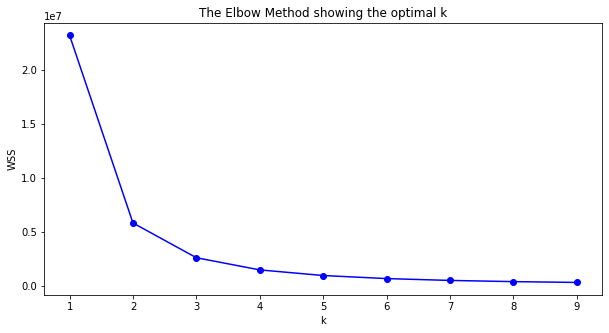

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(10,5))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Portano, o número de k ideal para nossos dados nesse momento é *k = 3*

***Aplicando o algoritmo K Means para encontrar grupos comuns de times:***

In [ ]:
from sklearn.cluster import KMeans

k = 3 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(Y)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(Y)
y_km

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
#Agregando isso em um data frame para levar essa info para nosso df origem
df_final_cluster = pd.DataFrame(X, columns=["Club","Overall_mean","qtd_players","percent","Club_ctg"])
df_final_cluster['Club_new'] = y_km
 
df_final_cluster

,Club,Overall_mean,qtd_players,percent,Club_ctg,Club_new
0,No Club,67.2241,241,1.32,407,2
1,AS Monaco,72.9394,33,0.18,17,0
2,Arsenal,75.1818,33,0.18,52,0
3,Atlético Madrid,75.0606,33,0.18,61,0
4,Borussia Dortmund,75.3333,33,0.18,86,0
...,...,...,...,...,...,...
647,Tromsø IL,62.7,20,0.11,589,1
648,Vitória,70.4,20,0.11,623,1
649,Limerick FC,54.5263,19,0.1,361,2
650,Sligo Rovers,56.6316,19,0.1,544,1


Vamos visualizar os grupos que serão dividos de maneira gráfica, em que, em duas dimensões nosso X = Qual nosso time representado pela variável categórica e Y = O rating médio de cada time.

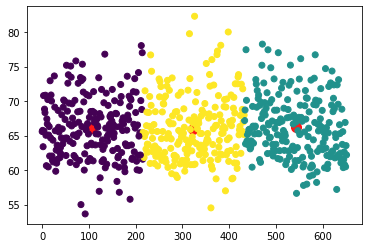

In [ ]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_
plt.scatter(centers[:,3], centers[:,0], c='red', s=100, alpha=0.9); #show the cluster centers
plt.scatter(Y[:,3], Y[:,0],c=y_km)
plt.show()

Bom, conseguimos agrupar esses times de maneira mais coerente e argumentativa, logo, levaremos a varíavel cluster para nossos dados e substituir a variável time, pelas classes preditas.


\\

No futebol, a divisão é relevante pois, os clubes poderiam ser dividos em continetes, na qual, a Europa, América Latina com certeza são os maios expoentes do poderil futebolístico em todos os sentidos, ademais, Ásia e América do Norte podem disputar esse terceiro lugar. De maneira geral, essa clusterização é interessante para nossa predição

In [ ]:
#Agregando a variável no df origem
df = df.merge(df_final_cluster,how='left', on='Club')
df.head(10)

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Loaned,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Duration (Months),Release Clause(R$),Argentina,Brazil,Colombia,England,France,Germany,Italy,Japan,Netherlands,Outras,Spain,Overall_mean,qtd_players,percent,Club_ctg,Club_new
0,31,Argentina,94,94,FC Barcelona,663000000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,0,170.0,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,213.066667,1.359000e+09,1,0,0,0,0,0,0,0,0,0,0,78.0303,33,0.18,212,0
1,33,Outras,94,94,Juventus,462000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,7.0,0,188.0,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,54.500000,7.626000e+08,0,0,0,0,0,0,0,0,0,1,0,82.28,25,0.14,326,2
2,26,Brazil,92,93,Paris Saint-Germain,711000000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,0,175.0,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,65.866667,1.368600e+09,0,1,0,0,0,0,0,0,0,0,0,77.4333,30,0.16,436,1
3,27,Spain,91,93,Manchester United,432000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,0,193.0,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,115.700000,8.316000e+08,0,0,0,0,0,0,0,0,0,0,1,77.2424,33,0.18,375,2
4,27,Outras,91,92,Manchester City,612000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,7.0,0,180.0,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,101.500000,1.178400e+09,0,0,0,0,0,0,0,0,0,1,0,76.7273,33,0.18,374,2
5,27,Outras,91,91,Chelsea,558000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,10.0,0,172.5,73.935496,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,103.500000,1.032600e+09,0,0,0,0,0,0,0,0,0,1,0,76.7879,33,0.18,134,0
6,32,Outras,91,91,Real Madrid,402000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,10.0,0,172.5,66.224432,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,102.466667,8.244000e+08,0,0,0,0,0,0,0,0,0,1,0,78.2424,33,0.18,471,1
7,31,Outras,91,91,FC Barcelona,480000000.0,455000.0,Right,5.0,4.0,3.0,High/ Medium,RS,9.0,0,183.0,86.182480,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,91.000000,9.840000e+08,0,0,0,0,0,0,0,0,0,1,0,78.0303,33,0.18,212,0
8,32,Spain,91,91,Real Madrid,306000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,15.0,0,183.0,82.100152,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,187.700000,6.276000e+08,0,0,0,0,0,0,0,0,0,0,1,78.2424,33,0.18,471,1
9,25,Outras,90,93,Atlético Madrid,408000000.0,94000.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,0,188.0,8

Substituindo alguns nan's já com a variável transformada, dado que, em passos anteriores as variáveis que ainda contém nans são as seguintes:

In [ ]:
# Ainda substituindo alguns nan's já com a variável transformada
df['Release Clause(R$)'].fillna(df['Release Clause(R$)'].mean(), inplace=True)   
df['Contract Duration (Months)'].fillna(df['Contract Duration (Months)'].mean(), inplace=True)  

In [ ]:
df.isnull().sum()

Age             0
Nationality     0
Overall         0
Potential       0
Club            0
               ..
Overall_mean    0
qtd_players     0
percent         0
Club_ctg        0
Club_new        0
Length: 70, dtype: int64

#### Preferred Foot(Pé preferido)

Uma variável bem interessante para quem gosta de futebol, pois, existem aquela mística de que os jogadores canhotos são melhores, bom, veremos:

In [ ]:
df['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [ ]:
df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

In [ ]:
df['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

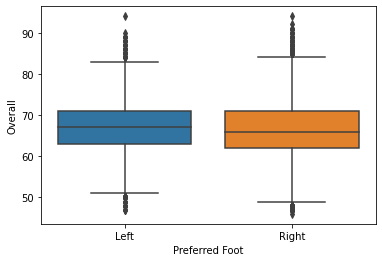

In [ ]:
ax = sns.boxplot(x="Preferred Foot", y="Overall", data=df)

In [ ]:
# Categorizando numericamente Preferred Foot:
df['Preferred Foot'] = labelencoder.fit_transform(df['Preferred Foot'])

Notamos que para jogadores profissionais a distribuição é bem parecida

#### Work Rate(Rating de trabalho)

In [ ]:
df['Work Rate'] = labelencoder.fit_transform(df['Work Rate'])
df['Work Rate'].unique()

array([8, 1, 2, 0, 6, 7, 3, 5, 4])

#### Position(Posição do atleta em campo)


| GK  | Goalkeeper        | Goleiro          |
|-----|-------------------|------------------|
| RB  | Right Back        | Lateral Direito  |
| CB  | Center Back       | Zagueiro         |
| LB  | Left Back         | Lateral Esquerdo |
| RWB | Right Wing Back   | Ala Direito      |
| LWB | Left Wing Back    | Ala Esquerdo     |
| CDM | Center Defensive  | Defensivo        |
| CM  | Center Midfielder | Meia Central     |
| CAM | Center Attacking  | Centro Ofensivo  |
| RM  | Right Midfielder  | Meia Direita     |
|  LM | Left Midfielder   | Meia Esquerda    |
| RW  | Right Wing        | Ponta Direito    |
| LW  | Left Wing         | Ponta Esquerdo   |
| CF  | Center Forward    | Segundo Atacante |
| ST  | Striker           | Centro Avante    |

In [ ]:
df['Position'].value_counts()

ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

Dessa maneira, dado nosso conhecimento empírico em FIFA e futebol, sabemos que a maior divisão entre as posições e transições em campo remetam a: Defesa, Meio e Ataque, portanto, um agrupamento eficiente seria juntar essas classes em 3 grupos maiores de Defesa, Meio e Ataque.

Serão esses 3 grandes grupos:



> **Defesa :**
*   GK - Goleiro
*   RB - Lateral Direito
*   CB - Zagueiro
*   LB - Lateral Esquerdo
*   CD - MDefensivo Volante


> **Meio :** 
*   CM - Meia Central
*   RM - Meia Direita
*   LM - Meia Esquerda



> **Ataque :**
*   CAM	 - Centro Ofensivo	Armador
*   RW	 - Ponta Direito
*   LW	 - Ponta Esquerdo
*   CF	 - Segundo Atacante
*   ST	 - Centro Avante
*   RWB	 - Ala Direito
*   LWB	 - Ala Esquerdo



In [ ]:
#Defesa
df['Position'].replace(to_replace = ["GK","RB","CB","LB","CD","LF","RCB","CDM","LCB"], value = [1,1,1,1,1,1,1,1,1],inplace=True)

#Meio
df['Position'].replace(to_replace = ["CM","RM","LM","RCM","LCM","LDM","LAM","RAM","RDM"], value = [2,2,2,2,2,2,2,2,2],inplace=True)

#Ataque
df['Position'].replace(to_replace = ["CAM","RW","LW","CF","ST","RWB","LWB","RS","LS","RF"], value = [3,3,3,3,3,3,3,3,3,3],inplace=True)

#.replace(to_replace =["M", "K"] ,value =[1000000,1000])

In [ ]:
df['Position'].unique()

array([3, 1, 2])

# 3 - Análise descritiva:

Boxplots das variáveis numericas:

<Figure size 576x576 with 0 Axes>

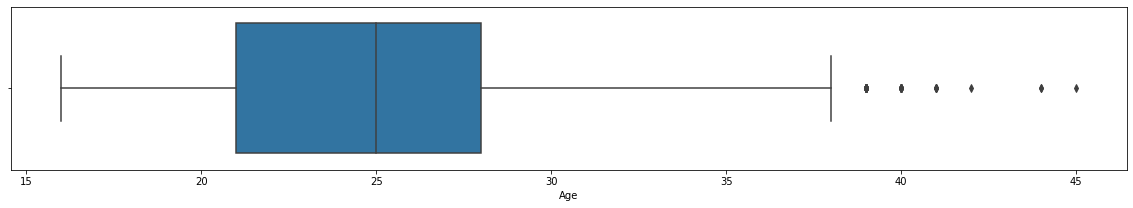

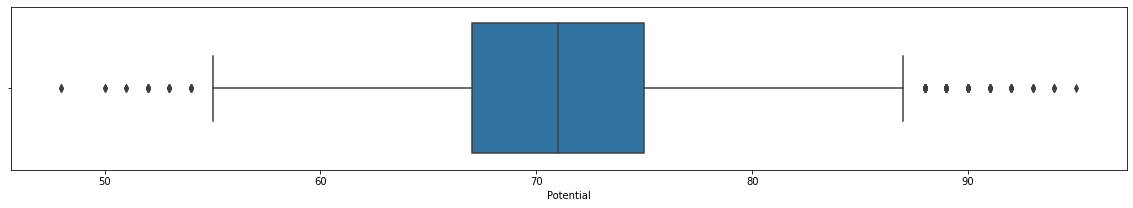

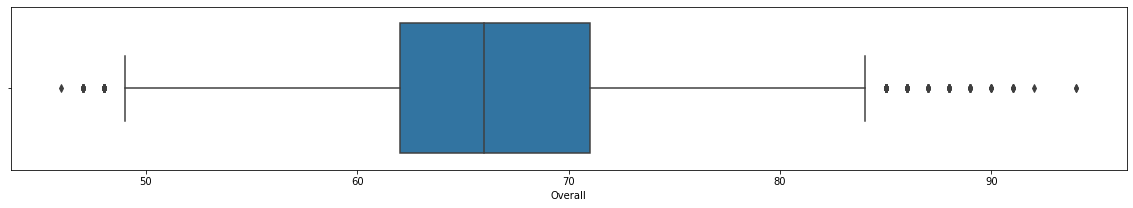

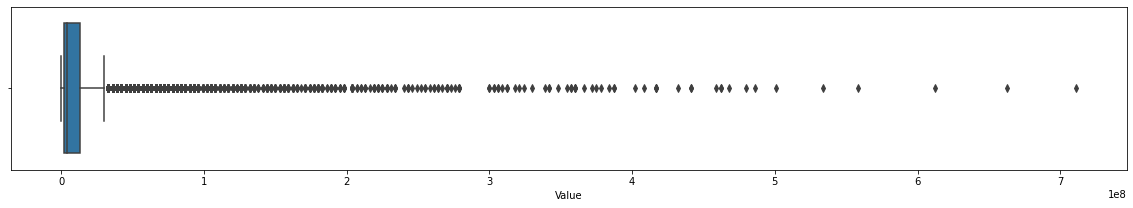

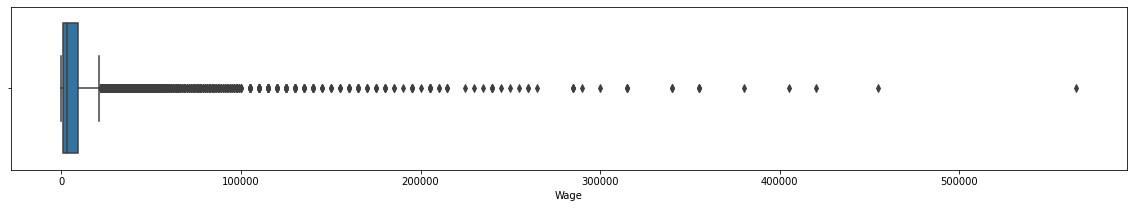

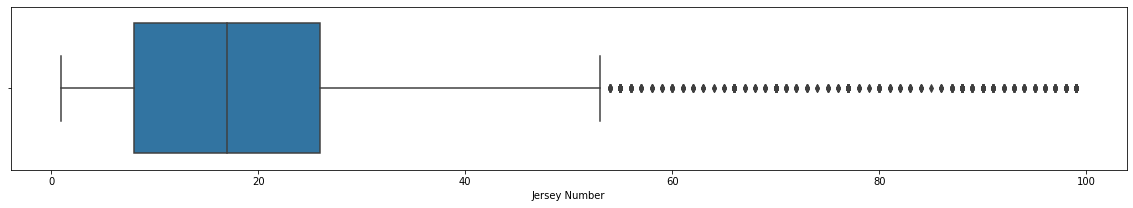

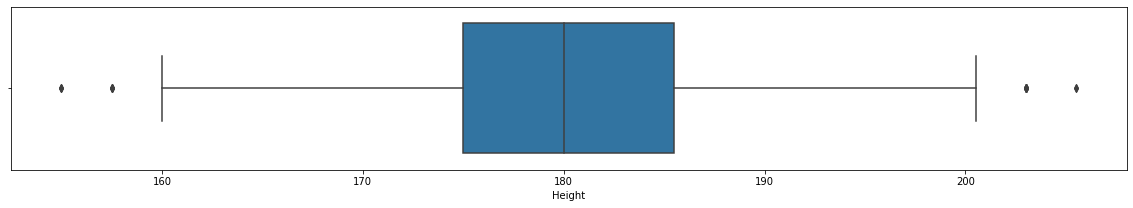

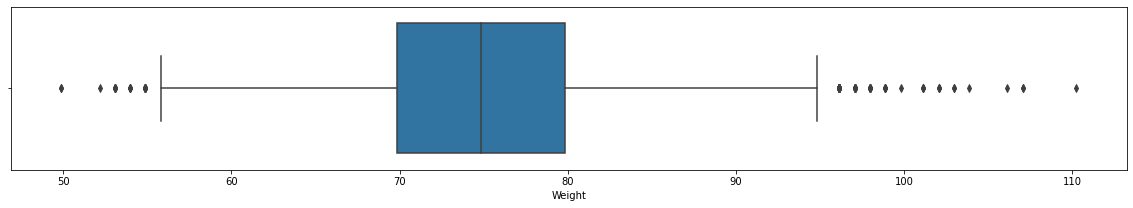

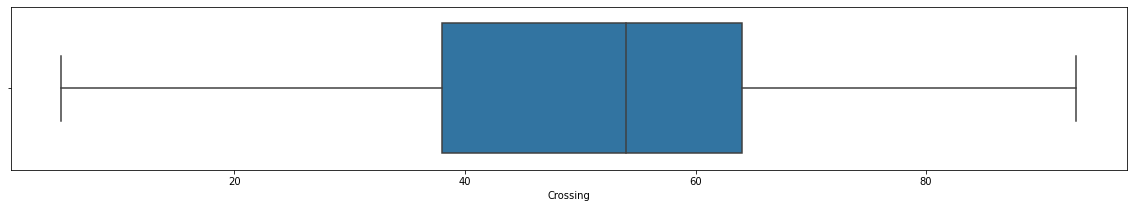

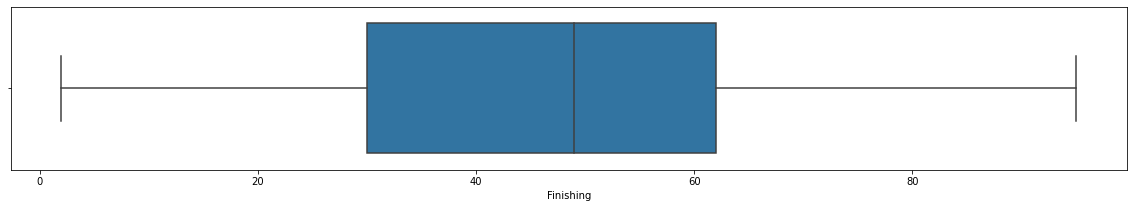

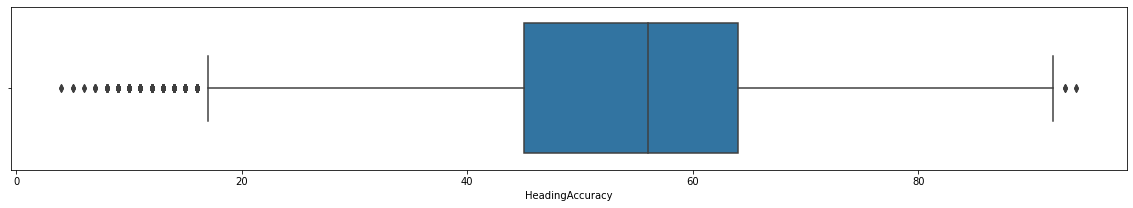

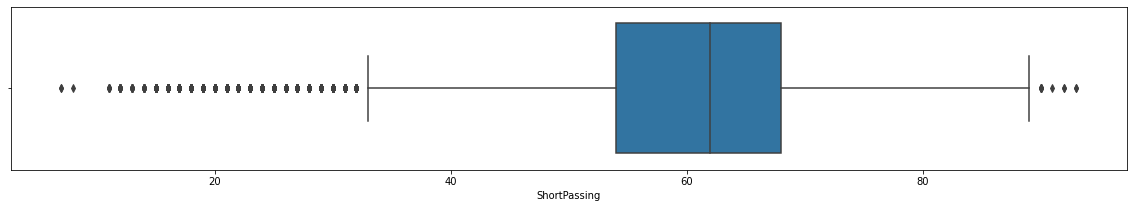

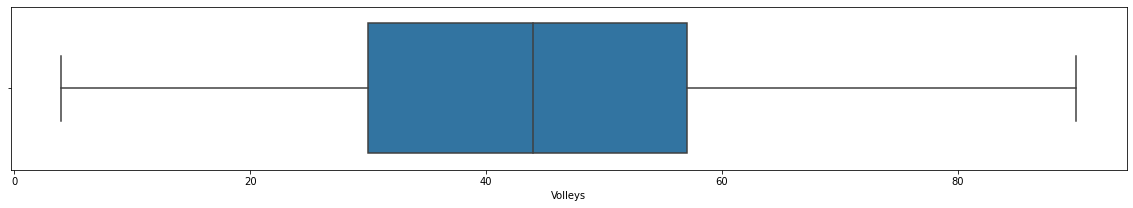

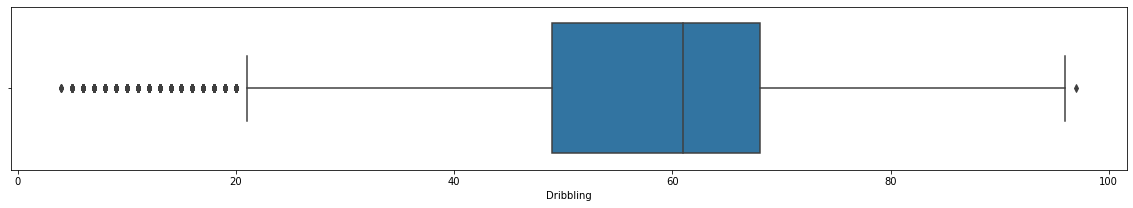

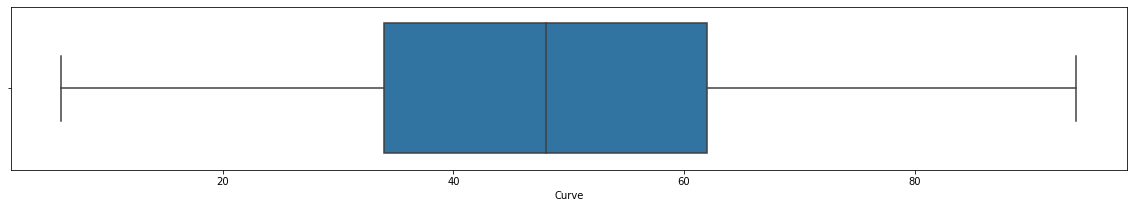

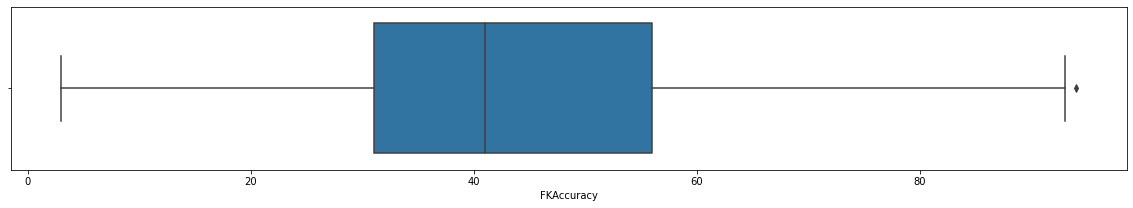

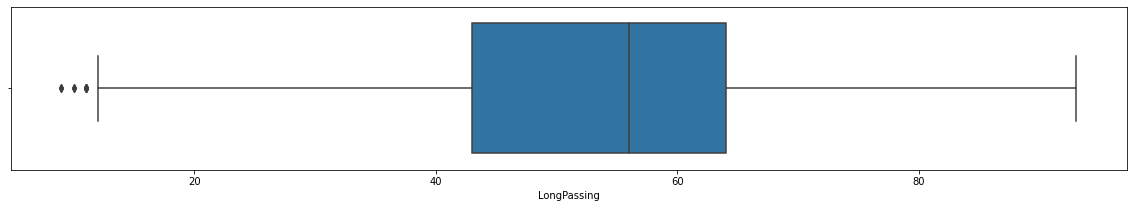

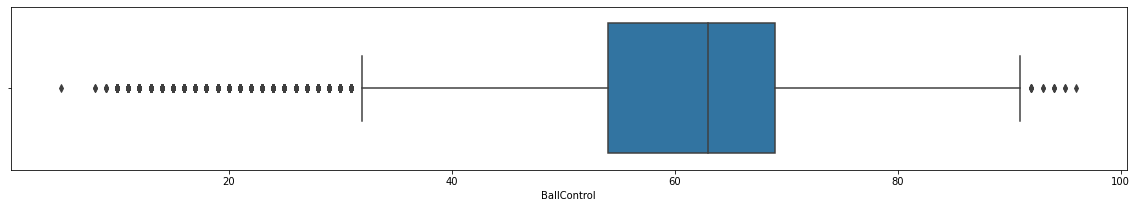

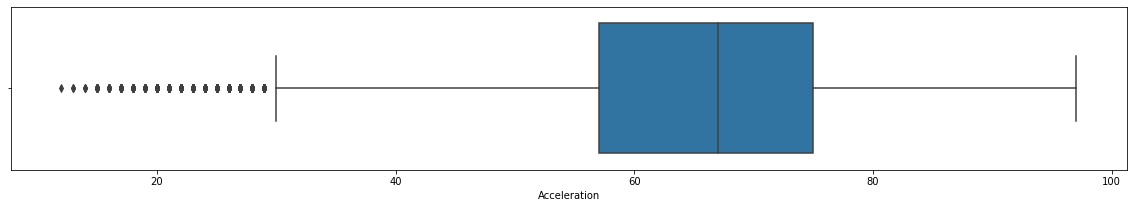

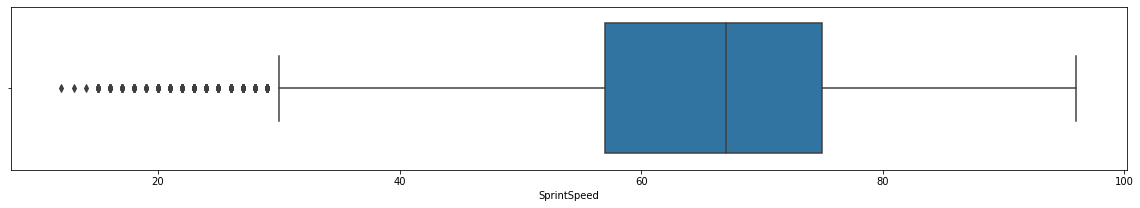

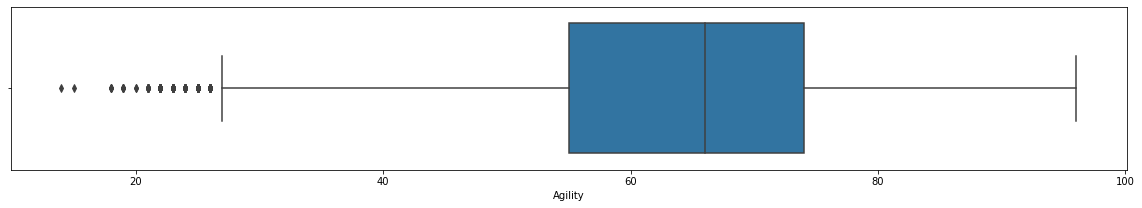

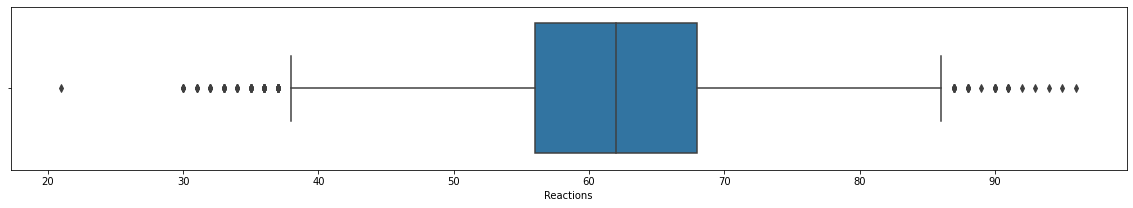

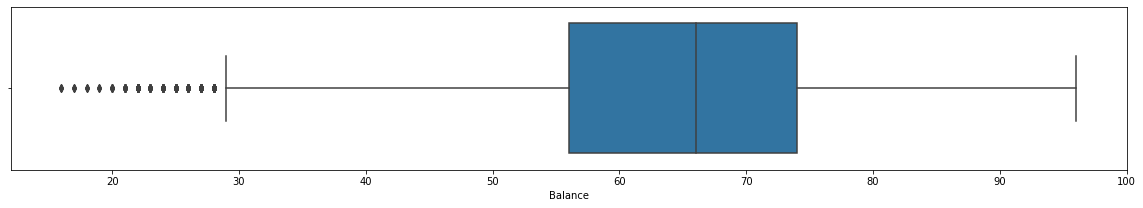

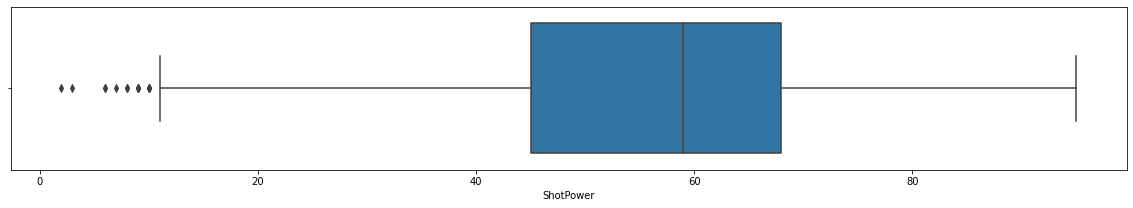

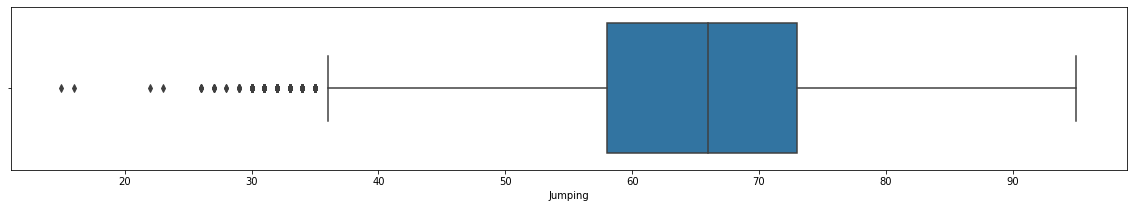

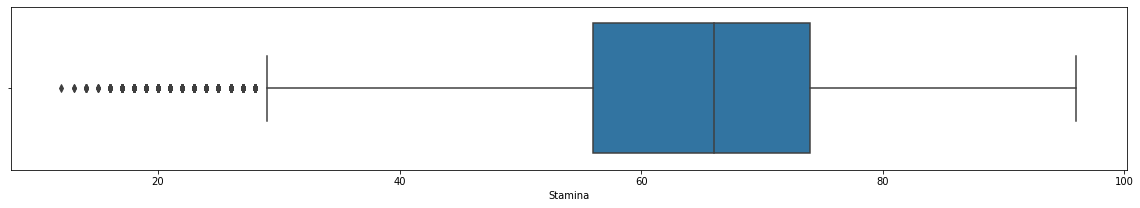

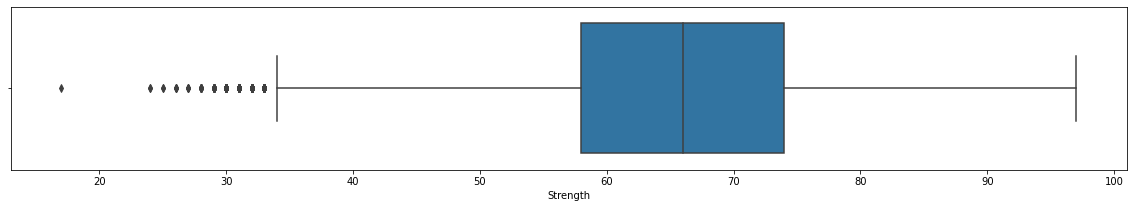

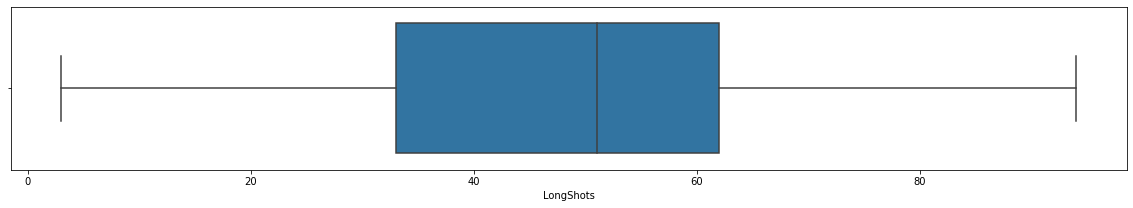

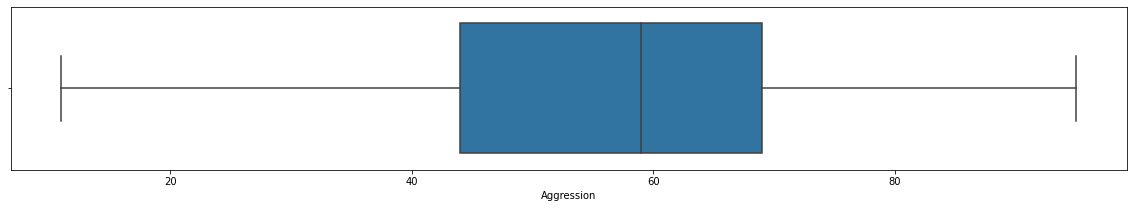

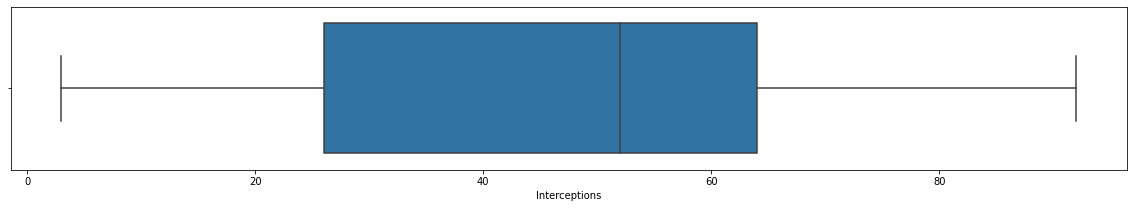

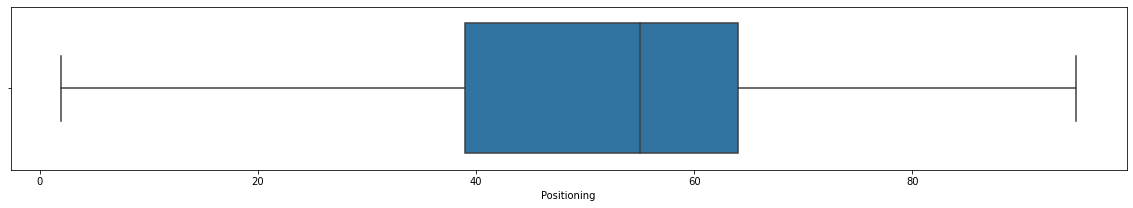

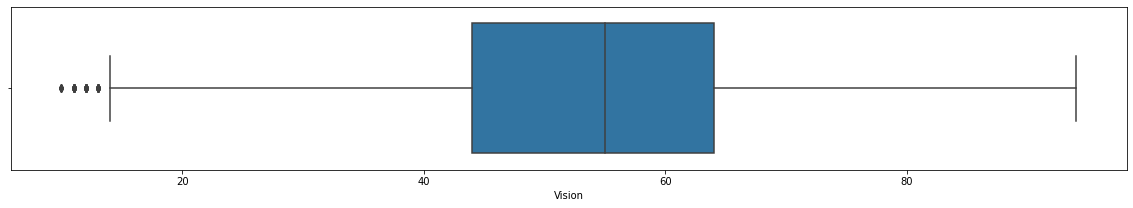

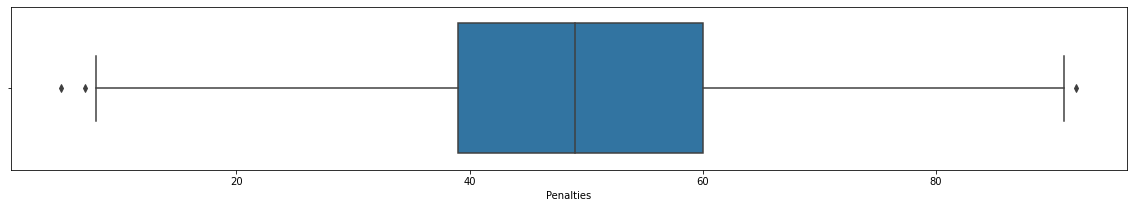

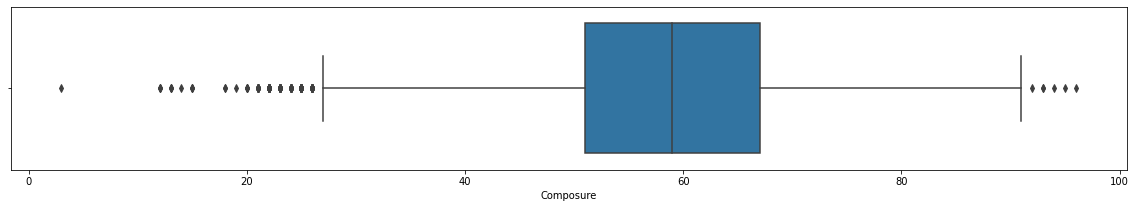

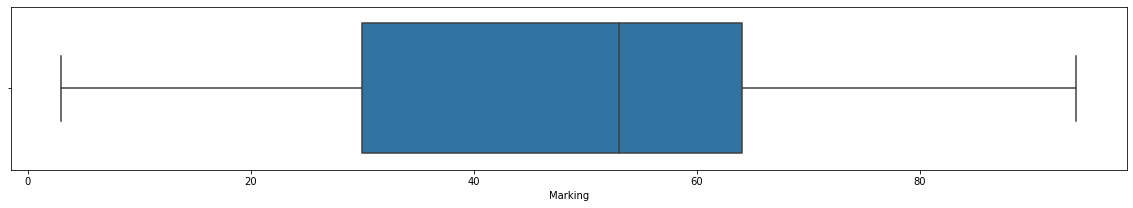

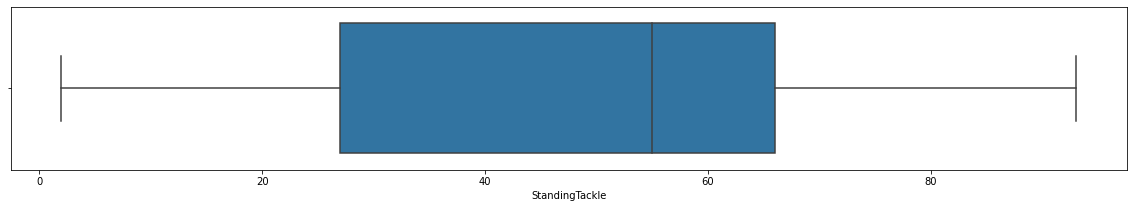

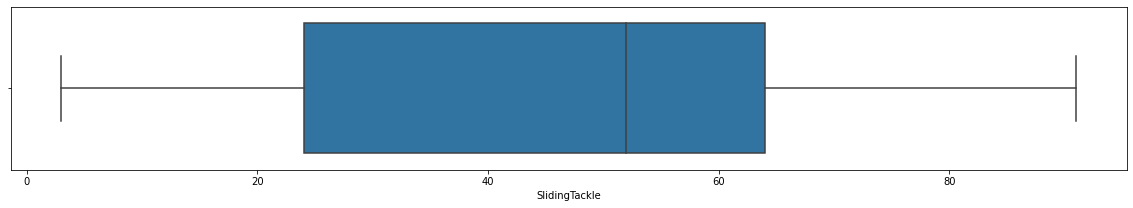

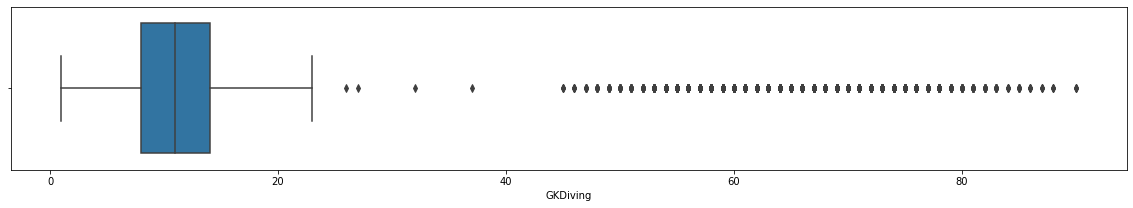

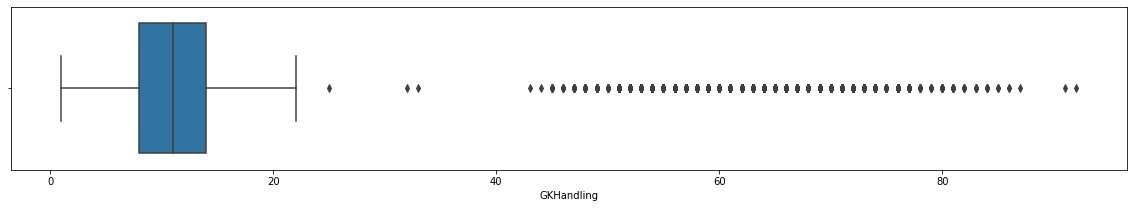

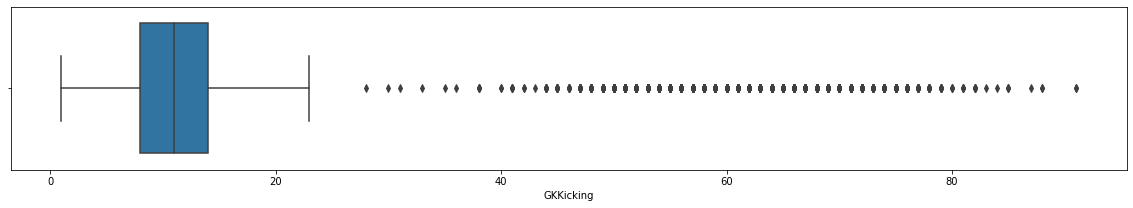

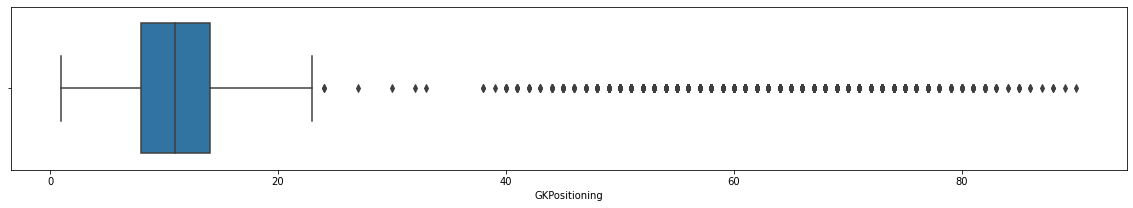

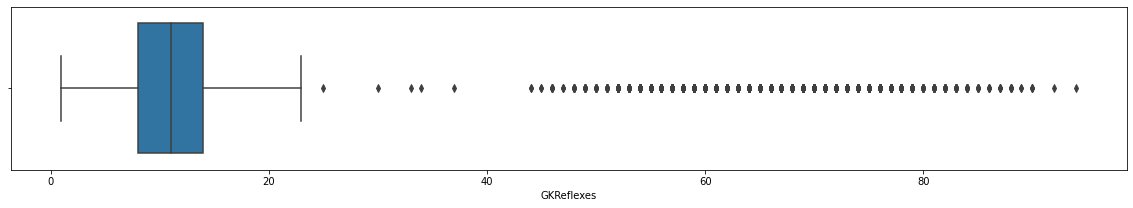

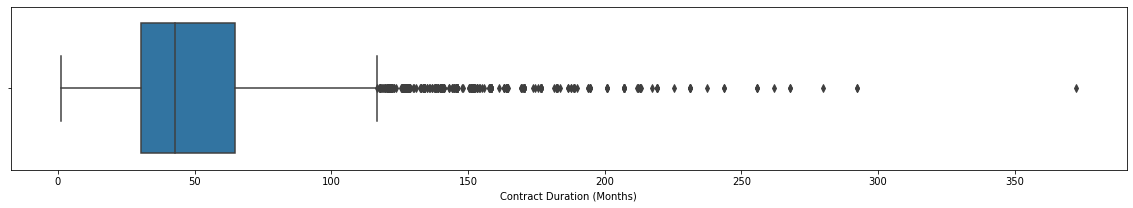

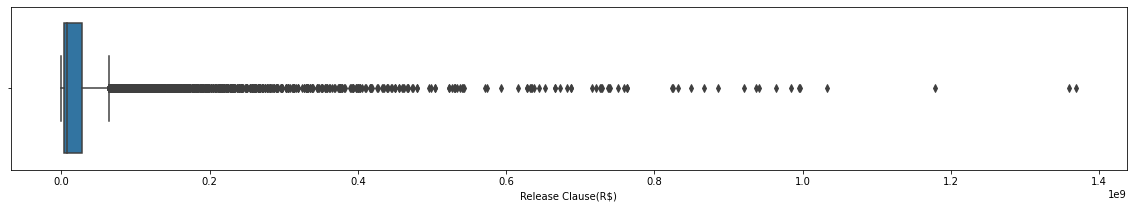

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))
var_num = [
  "Age", "Potential", "Overall", "Value",	"Wage", "Jersey Number",
  "Height",	"Weight",	"Crossing",	"Finishing",	"HeadingAccuracy",
  "ShortPassing",	"Volleys",	"Dribbling",	"Curve",	"FKAccuracy",	"LongPassing",
  "BallControl",	"Acceleration",	"SprintSpeed",	"Agility",	"Reactions",	
  "Balance",	"ShotPower",	"Jumping",	"Stamina",	"Strength",	"LongShots",
  "Aggression",	"Interceptions",	"Positioning",	"Vision",	"Penalties",
  "Composure",	"Marking",	"StandingTackle",	
  "SlidingTackle",	"GKDiving",	"GKHandling",	"GKKicking",
  "GKPositioning",	"GKReflexes", "Contract Duration (Months)",
  "Release Clause(R$)"
]

for variable in var_num:
  plt.figure(figsize=(20, 3))
  sns.boxplot(x=variable, data=df)
  plt.show(True)

Ao observar todos os boxplots, não há indícios de que os outliers detectados sejam de fato pontos aberrantes, pois, de acordo com a natureza de cada variável, os valores são admissíveis. Vamos agora fazer a sumarização de cada uma das variáveis numéricas para saber se de fato todos os valores dessas variáveis esão dentro da faixa esperada.

In [ ]:
for variable in var_num:
  print(df[variable].describe())

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64
count    18207.000000
mean        71.307299
std          6.136496
min         48.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: Potential, dtype: float64
count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64
count    1.820700e+04
mean     1.466718e+07
std      3.352583e+07
min      6.000000e+04
25%      1.950000e+06
50%      4.200000e+06
75%      1.320000e+07
max      7.110000e+08
Name: Value, dtype: float64
count     18207.000000
mean       9731.312133
std       21999.290406
min           0.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000

De fato, de acordo com os mínimos e máximos de cada variável numérica (mais precisamente os máximos e mínimos), não há pontos aberrantes em nenhuma delas.

Gráficos de barras das variáveis categóricas e das variáveis numericas discretas:

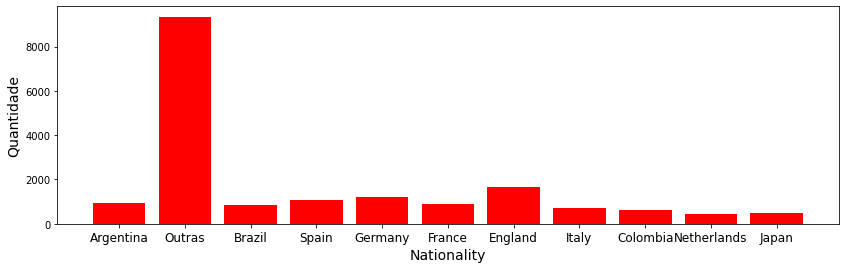

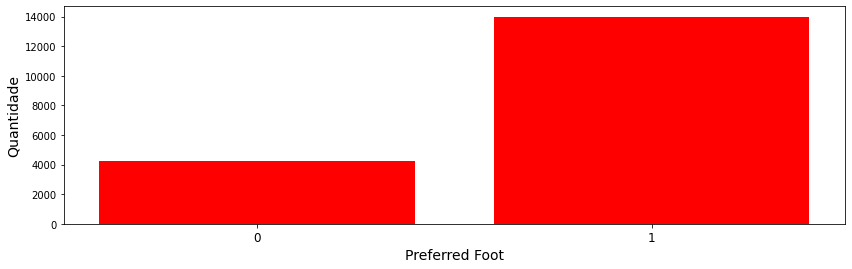

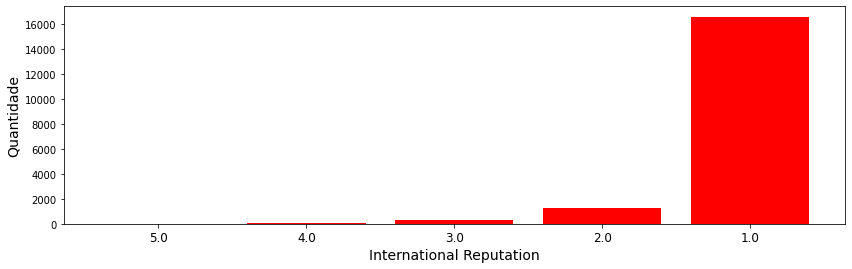

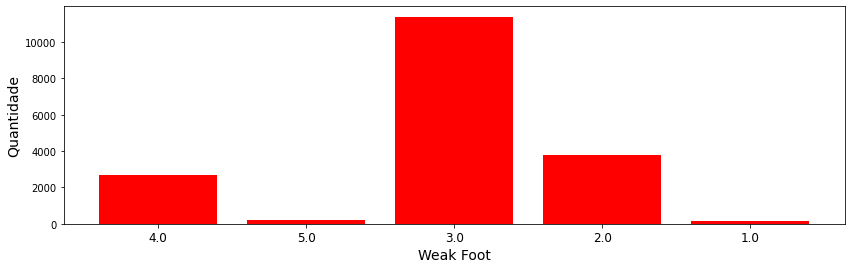

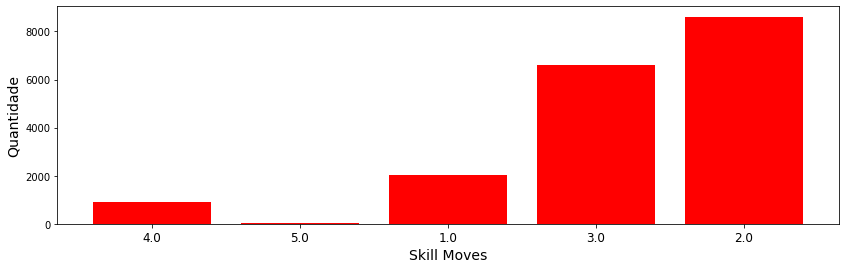

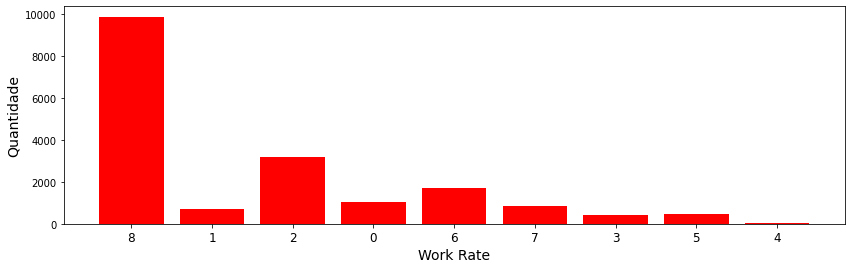

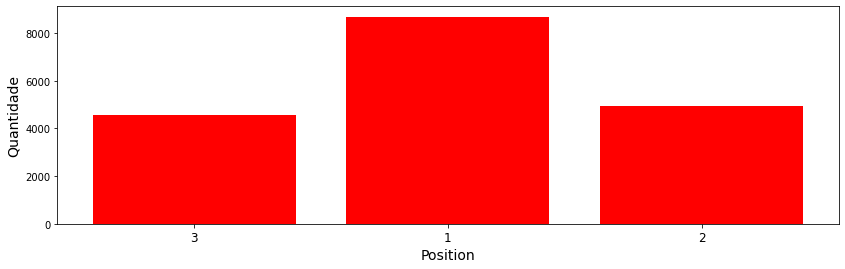

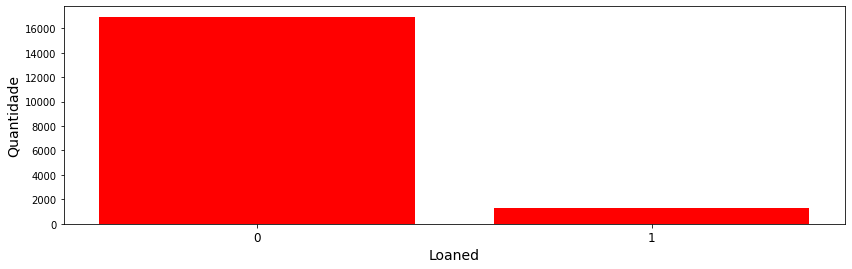

In [ ]:
cat_vars = [
  "Nationality", "Preferred Foot", 
  "International Reputation",	"Weak Foot",	
  "Skill Moves", "Work Rate",	"Position", 
  "Loaned"
]

for cv in cat_vars:

    fig= plt.figure(figsize=(14,4))
    values = pd.unique(df[cv])
    y_pos = np.arange(len(values))
    freq = np.zeros(len(values))
    ind = 0
    y_values = np.array(df[cv])

    for i in values:
        counter = 0
        for j in range(0,len(y_values)):
            if y_values[j] == i:
                counter = counter + 1
        freq[ind] = counter
        ind = ind + 1

    plt.xticks(y_pos, values)
    plt.bar(y_pos, freq, color="red")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    plt.xlabel(cv,fontsize = 14) 
    plt.ylabel("Quantidade", fontsize = 14) 
    plt.show()

Correlações entre variáveis numericas:

In [ ]:
#Matriz de correlações:
corr = df.corr()
corr.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Contract Duration (Months),Release Clause(R$),Argentina,Brazil,Colombia,England,France,Germany,Italy,Japan,Netherlands,Outras,Spain,Club_new
Age,1.000000,0.452350,-0.253312,0.077601,0.141145,0.002583,0.253457,0.059790,0.027641,-0.080191,-0.089561,-0.240711,0.082910,0.228361,0.130391,0.068578,0.147009,0.132737,0.142304,0.010154,0.143106,0.193238,0.181095,0.084868,-0.158479,-0.151502,-0.019372,0.452587,-0.089770,0.156761,0.176957,0.097677,0.332404,0.154913,0.264876,0.197610,0.082346,0.187200,0.139370,0.390560,0.142647,0.119603,0.102967,0.101157,0.106293,0.104839,0.116264,0.103190,0.128535,0.058672,0.054058,0.116918,0.004772,-0.074123,-0.024922,-0.044564,0.034588,0.036455,-0.038386,-0.016781,0.010892,-0.005697
Overall,0.452350,1.000000,0.660939,0.628557,0.571926,-0.044681,0.499654,0.211779,0.414906,-0.238901,0.026394,-0.216928,0.039215,0.150085,0.394776,0.332349,0.340606,0.502300,0.391143,0.372241,0.419282,0.396695,0.483668,0.459968,0.196771,0.210542,0.264820,0.849622,0.103108,0.440898,0.264303,0.365474,0.349153,0.420586,0.395273,0.321166,0.356316,0.498646,0.341259,0.727293,0.286363,0.252503,0.222700,-0.025924,-0.025049,-0.029358,-0.017666,-0.023264,0.211734,0.597821,0.078669,0.158274,-0.017979,-0.128869,0.051911,-0.005835,0.055636,-0.085974,0.032709,-0.102843,0.125266,-0.002653
Potential,-0.253312,0.660939,1.000000,0.575853,0.486413,-0.038633,0.372887,0.161922,0.354516,-0.151857,0.074919,-0.008466,-0.009245,-0.011065,0.245911,0.242952,0.200655,0.368578,0.254484,0.314497,0.279480,0.230162,0.320904,0.353809,0.234219,0.236379,0.221941,0.512575,0.137796,0.287840,0.108970,0.202227,0.075643,0.266298,0.170891,0.154651,0.245209,0.347565,0.223909,0.439279,0.162531,0.143326,0.128766,-0.053357,-0.054581,-0.058964,-0.052502,-0.053252,0.141549,0.562346,0.072234,0.072681,-0.008102,-0.065596,0.080183,0.016962,0.045153,-0.125054,0.044695,-0.119766,0.134891,-0.009025
Value,0.077601,0.628557,0.575853,1.000000,0.856924,-0.016998,0.653603,0.165301,0.315396,-0.166980,0.076620,-0.097067,0.003050,0.043974,0.249651,0.256164,0.184627,0.327097,0.287923,0.271187,0.286438,0.265601,0.302095,0.307967,0.170552,0.172455,0.193553,0.541826,0.113750,0.280833,0.123382,0.210874,0.128616,0.279498,0.184593,0.140980,0.258677,0.356462,0.239372,0.450724,0.134428,0.108796,0.088178,-0.027930,-0.028256,-0.030201,-0.027092,-0.027884,0.203986,0.973310,0.026475,0.084368,-0.021961,-0.053482,0.050937,0.004027,0.021613,-0.046954,0.012168,-0.070455,0.087121,0.005805
Wage,0.141145,0.571926,0.486413,0.856924,1.000000,-0.015386,0.668719,0.140745,0.263540,-0.149667,0.045997,-0.085555,0.019950,0.062269,0.232793,0.217400,0.187933,0.296638,0.257311,0.237107,0.259504,0.236343,0.276712,0.277566,0.124962,0.130292,0.156259,0.495471,0.088857,0.258305,0.129667,0.177530,0.139335,0.249039,0.194546,0.157387,0.226734,0.315339,0.222400,0.419521,0.145568,0.126268,0.111005,-0.025590,-0.025173,-0.028320,-0.025484,-0.025987,0.184807,0.828161,0.018756,0.079797,-0.036771,0.003056,0.045171,-0.001109,0.034112,-0.046854,0.002207,-0.083293,0.074944,-0.009781


Variáveis mais correlacioandas à variável resposta "Valor" (corr. moderada, alta e muito alta):

In [ ]:
for indx in corr["Value"].index:
  if abs(corr["Value"][indx]) > 0.3 and corr["Value"][indx] != 1:
    print(indx, "- módulo da correlação: ",corr["Value"][indx], ".")

Overall - módulo da correlação:  0.6285572040305355 .
Potential - módulo da correlação:  0.5758527123099594 .
Wage - módulo da correlação:  0.8569241255968699 .
International Reputation - módulo da correlação:  0.6536034069653434 .
Skill Moves - módulo da correlação:  0.31539583173530106 .
ShortPassing - módulo da correlação:  0.327096586461204 .
LongPassing - módulo da correlação:  0.3020954578006473 .
BallControl - módulo da correlação:  0.3079672809757396 .
Reactions - módulo da correlação:  0.5418260332322713 .
Vision - módulo da correlação:  0.35646189216672525 .
Composure - módulo da correlação:  0.45072367284607884 .
Release Clause(R$) - módulo da correlação:  0.973310108785648 .


Heatmap:

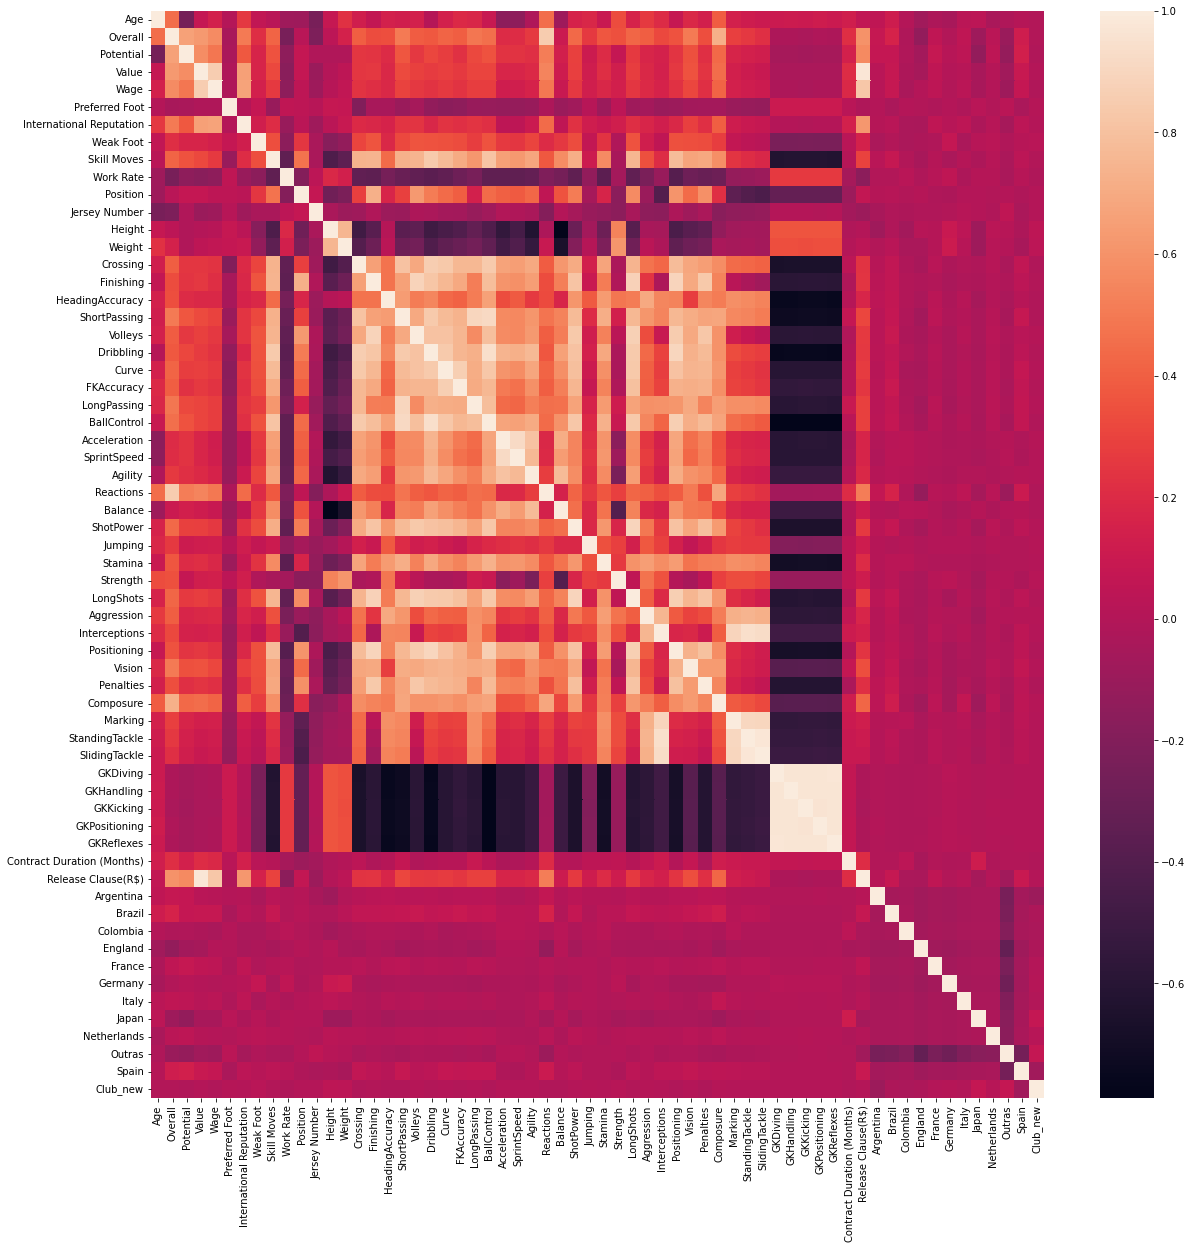

In [ ]:
#Heatmap:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr)

# 4 - Processamento dos dados

Nessa etapa, criaremos a base final para fitarmos o modelo

In [ ]:
df.head(10)

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Loaned,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Duration (Months),Release Clause(R$),Argentina,Brazil,Colombia,England,France,Germany,Italy,Japan,Netherlands,Outras,Spain,Overall_mean,qtd_players,percent,Club_ctg,Club_new
0,31,Argentina,94,94,FC Barcelona,663000000.0,565000.0,0,5.0,4.0,4.0,8,3,10.0,0,170.0,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,213.066667,1.359000e+09,1,0,0,0,0,0,0,0,0,0,0,78.0303,33,0.18,212,0
1,33,Outras,94,94,Juventus,462000000.0,405000.0,1,5.0,4.0,5.0,1,3,7.0,0,188.0,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,54.500000,7.626000e+08,0,0,0,0,0,0,0,0,0,1,0,82.28,25,0.14,326,2
2,26,Brazil,92,93,Paris Saint-Germain,711000000.0,290000.0,1,5.0,5.0,5.0,2,3,10.0,0,175.0,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,65.866667,1.368600e+09,0,1,0,0,0,0,0,0,0,0,0,77.4333,30,0.16,436,1
3,27,Spain,91,93,Manchester United,432000000.0,260000.0,1,4.0,3.0,1.0,8,1,1.0,0,193.0,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,115.700000,8.316000e+08,0,0,0,0,0,0,0,0,0,0,1,77.2424,33,0.18,375,2
4,27,Outras,91,92,Manchester City,612000000.0,355000.0,1,4.0,5.0,4.0,0,2,7.0,0,180.0,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,101.500000,1.178400e+09,0,0,0,0,0,0,0,0,0,1,0,76.7273,33,0.18,374,2
5,27,Outras,91,91,Chelsea,558000000.0,340000.0,1,4.0,4.0,4.0,2,1,10.0,0,172.5,73.935496,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,103.500000,1.032600e+09,0,0,0,0,0,0,0,0,0,1,0,76.7879,33,0.18,134,0
6,32,Outras,91,91,Real Madrid,402000000.0,420000.0,1,4.0,4.0,4.0,0,2,10.0,0,172.5,66.224432,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,102.466667,8.244000e+08,0,0,0,0,0,0,0,0,0,1,0,78.2424,33,0.18,471,1
7,31,Outras,91,91,FC Barcelona,480000000.0,455000.0,1,5.0,4.0,3.0,2,3,9.0,0,183.0,86.182480,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,91.000000,9.840000e+08,0,0,0,0,0,0,0,0,0,1,0,78.0303,33,0.18,212,0
8,32,Spain,91,91,Real Madrid,306000000.0,380000.0,1,4.0,3.0,3.0,2,1,15.0,0,183.0,82.100152,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,187.700000,6.276000e+08,0,0,0,0,0,0,0,0,0,0,1,78.2424,33,0.18,471,1
9,25,Outras,90,93,Atlético Madrid,408000000.0,94000.0,1,3.0,3.0,1.0,8,1,1.0,0,188.0,87.089664,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92

In [ ]:
df.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Loaned',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Contract Duration (Months)', 'Release Clause(R$)',
       'Argentina', 'Brazil', 'Colombia', 'England', 'France', 'Germany',
       'Italy', 'Japan', 'Netherlands', 'Outras', 'Spain', 'Overall_mean',
       'qtd_players', 'per

Deletaremos algumas colunas redundantes, as quais, já tratamos e temos elas de maneira atualizada

In [ ]:
drop_list2 = ['Nationality','Club','Release Clause','Club_ctg',"qtd_players","percent","Overall_mean"]

df.drop(columns=drop_list2, inplace=True)

X = df

KeyError: ignored

In [ ]:
X.columns

Index(['Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Loaned', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes',
       'Contract Duration (Months)', 'Release Clause(R$)', 'Argentina',
       'Brazil', 'Colombia', 'England', 'France', 'Germany', 'Italy', 'Japan',
       'Netherlands', 'Outras', 'Spain', 'Club_new'],
      dtype='object')

Transformaremos as variáveis categóricas e numéricas em váriaveis dummies

In [ ]:
X = pd.get_dummies(df, columns=["Preferred Foot","Work Rate","Position","Loaned",'Club_new'])

#test = pd.get_dummies(test,columns=["Preferred Foot","Club_new","Work Rate","Position","Loaned"])

X.head(5)

,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Contract Duration (Months),Release Clause(R$),Argentina,Brazil,Colombia,England,France,Germany,Italy,Japan,Netherlands,Outras,Spain,Preferred Foot_0,Preferred Foot_1,Work Rate_0,Work Rate_1,Work Rate_2,Work Rate_3,Work Rate_4,Work Rate_5,Work Rate_6,Work Rate_7,Work Rate_8,Position_1,Position_2,Position_3,Loaned_0,Loaned_1,Club_new_0,Club_new_1,Club_new_2
0,94,94,663000000.0,565000.0,5.0,4.0,4.0,10.0,170.0,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,213.066667,1.359000e+09,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1,94,94,462000000.0,405000.0,5.0,4.0,5.0,7.0,188.0,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,54.500000,7.626000e+08,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,92,93,711000000.0,290000.0,5.0,5.0,5.0,10.0,175.0,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,65.866667,1.368600e+09,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,91,93,432000000.0,260000.0,4.0,3.0,1.0,1.0,193.0,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,115.700000,8.316000e+08,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
4,91,92,612000000.0,355000.0,4.0,5.0,4.0,7.0,180.0,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,101.500000,1.178400e+09,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


Devemos obter os dados de treino e teste para avaliarmos a perfomance do modelo, como nossos não vieram dividos, podemos:

In [ ]:
#Treino = 80% do data set e treino corresponde a 20% do dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, train_size=0.8, random_state=37)


In [ ]:
train.columns

Index(['Overall', 'Potential', 'Value', 'Wage', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Contract Duration (Months)', 'Release Clause(R$)', 'Argentina',
       'Brazil', 'Colombia', 'England', 'France', 'Germany', 'Italy', 'Japan',
       'Netherlands', 'Outras', 'Spain', 'Preferred Foot_0',
       'Preferred Foot_1', 'Work Rate_0', 'Work Rate_1', 'Work Rate_2',
       'Work Rate_3', 'Work Rate_4', 'Work Rate_5', 'Work 

Devemos normalizar essa variáveis devido a diferença brusca entre as unidades de medidas dos atributos

In [ ]:
#Variaveis para normalizar 
used = ['Overall', 'Potential', 'Value', 'Wage', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Contract Duration (Months)', 'Release Clause(R$)']

In [ ]:
#Padronizando os dados
mms = MinMaxScaler()

train[used] = mms.fit_transform(train[used])
test[used] = mms.transform(test[used])

Precisamos definir nossa váriavel resposta [y] e as variáveis do conjunto de treinamento, como citamos anteriormente, nosso objetivo é predizer os valores dos preços dos jogadores de futebol.

In [ ]:
# Conjunto de treino
X_t = train.drop(["Release Clause(R$)"], axis=1)

In [ ]:
# Y do treino
y = train['Release Clause(R$)']

# 5 - Treinando o modelo

In [ ]:
# Método hold-out
X_train,X_val,y_train,y_val = train_test_split(X_t,y,test_size=0.25, random_state=37)

Por mais que seja um problema de regressão convencional, optamos por utilizar um algoritmo conhecido como Extra Tress Regression, o qual, funciona como uma árvore de decisão.

\
No final, os resultados obtidos nas folhas para nossas observações são sumarizadas em uma média aritmética dos resultados e assim obtemos a predição para tais observações

In [ ]:
modelETR = ExtraTreesRegressor()
modelETR.fit(X_train,y_train)
y_pred = modelETR.predict(X_val)

In [ ]:
R2t = r2_score(y_val, y_pred)
print('R2 para dados de treino[ExtraTrees]:', R2t)

R2 para dados de treino: 0.9877426815473995


Podemos observar também para comparação, a performance do modelo de regressão multivariada convencional:

In [ ]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_lm = lm.predict(X_val)

R2lm = r2_score(y_val, y_pred_lm)
print('R2 o modelo de regressão linear multipla:', R2lm)

R2 o modelo de regressão linear multipla: 0.9546853798533446


#### Testando o modelo com os dados que ficaram nos dados de teste

In [ ]:
y_test = test['Release Clause(R$)']

In [ ]:
test_t = test.drop(["Release Clause(R$)"], axis=1)

In [ ]:
modelETR = ExtraTreesRegressor()
modelETR.fit(X_t,y)
y_predt = modelETR.predict(test_t)

# 6 - Avaliação dos modelos

### Modelo Extra Trees Regression

Observamos qual foi o fit dos nosso modelo ExtraTreesRegression aos dados graficamente:

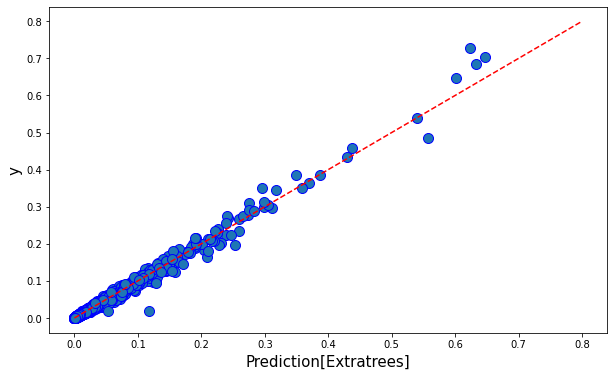

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
l = plt.plot(y_predt, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction[Extratrees]", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

#### Análise dos resíduos normalizados

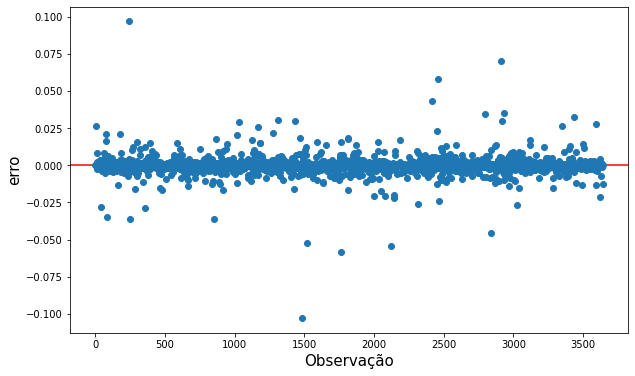

In [ ]:
e = np.array(y_predt - y_test)
t = np.arange(0,len(e))
plt.figure(figsize=(10,6))
plt.axhline(y=0, color = 'red')
plt.plot(t,e,'o')
plt.ylabel("erro", fontsize=15)
plt.xlabel("Observação", fontsize=15)

plt.show(True)

#### R2 Ajustado



In [ ]:
def adjusted_r2(y_test, y_pred,X_train):
    
  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
  return adj_r2

In [ ]:
R2A = adjusted_r2(y_test, y_predt,X_train)
print('R2 Ajustado :', R2A)

R2 Ajustado : 0.987644161785591


#### Erro Quadrático Médio (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_predt)
print(MSE)

2.515637461075917e-05


#### Erro Absoluto Médio (MAE)


In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_predt)
print(MAE)

0.0016719863265744841


### Modelo Regressão Linear Multivariado

Observamos qual foi o fit dos nosso modelo ExtraTreesRegression aos dados graficamente:

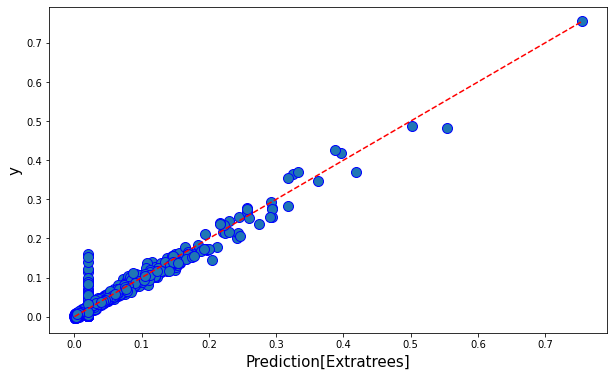

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
l = plt.plot(y_val, y_pred_lm, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction[Extratrees]", fontsize=15)

# mostra os valores preditos e originais
xlm = np.arange(min(y_val), 1.2*max(y_val),(max(y_val)-min(y_val)/10))
yl = xlm
plt.plot(xlm, yl, 'r--')
plt.show(True)

#### Análise dos resíduos normalizados

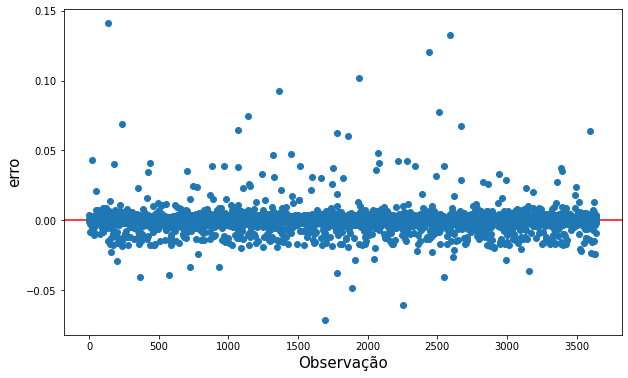

In [ ]:
e = np.array(y_pred_lm - y_val)
t = np.arange(0,len(e))
plt.figure(figsize=(10,6))
plt.axhline(y=0, color = 'red')
plt.plot(t,e,'o')
plt.ylabel("erro", fontsize=15)
plt.xlabel("Observação", fontsize=15)

plt.show(True)

#### R2 Ajustado



In [ ]:
def adjusted_r2(y_test, y_pred,X_train):
    
  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
  return adj_r2

In [ ]:
R2A = adjusted_r2(y_val, y_pred_lm,X_train)
print('R2 Ajustado :', R2A)

R2 Ajustado : 0.9537323241856499


#### Erro Quadrático Médio (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_val, y_pred_lm)
print(MSE)

7.293600872996908e-05


#### Erro Absoluto Médio (MAE)


In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_val, y_pred_lm)
print(MAE)

0.003790588307988136


# 7 - Interpretação dos modelos

De maneira geral, podemos afirmar que os dois modelos, Regressão Múltiplica e Extra Tress Regression, foram efetivos ao predizer os valores dos jogadores, pois, ao observarmos as métricas acima, notaos que os erros são pequenos, o R2 tem um valor agrádavel, portanto, concluimos a efetividade dos dois regressores.

\
Contudo, ao observarmos os gráficos dos nossos modelos lineares, notamos que, o regressor múltiplo contém desvios bastantes elevados aos menores valores de x e y, existe dados que tendem a uma reta vertical, na qual, para um conjunto de dados maior isso poderia se tornar mais prejudicial.

\
O R2 Score ou coeficiente de determinação indica qual a proporção da variância dos dados que é explicada, ou seja, o quão próximo as medidas reais estão nos valores preditos e a outra proporção são resíduos "não explicaveis" por nossos modelos, pois constituiriam a variância residual. Sendo assim, o R2 Score do modelo Extra trees = 98,7% é maior que o R2 Score do modelo de regressão múltipla = 95,4%, ou seja, nosso modelo baseado em árvores teve mais explicabilidade e mais fit com os dados, ademais, é evidente a diferença gráfica entre os dois modelos, em que, o Extra Tress Regression contém uma tendência quase perfeita e notamos os dados mais ajustados e consequentemente menos variância.

\
Quando observamos o gráfico dos resíduos diante das nossas observações, nos dois modelos notamos efetividade e cumprimento de uma das suposições para normalidade, contudo, padronizamos esses dados e isso tendência um pouco essa análise. Mas, de modo geral, os erros se distribuiem de forma constante e aleatória em torno do zero e é um bom sinal para normalidade e fit performático para os dados.

\
O Erro Quadrático Médio (MSE), consiste na média do erro ao quadrado divido pelo número de observações, portanto, temos uma esperança de receber em média um erro quadrático bem pequeno considerando os modelos. Ademais, o modelo com visualizações vai ser punido pela diferença ao quadrado, logo, quando notamos os valores mais distantes no modelo de regressão múltiplica, confirmamos que em média os resíduos do regressor baseado em árvores é menor, e quanto mais próximo de 0 melhor.

\
O Erro Absoluto Médio (MAE), é uma métrica mais suavizada visando observar qual o erro médio esperado para cada obserção, em que, conseguimos estimar qual a proximidade ou não desses dados, por mais que diferença dessa métrica entre os dois modelos seja quase nula, ainda notamos a qualidade do modelo de Extra Tress Regression

# 8 - Conclusão

Por mais que esses dados sejam simulados para compor um video game, sabemos da potência na busca de performance e realidade para cativar os jovens gamers.

\
Existiam diversas variáveis pertinentes ao perfil atlético dos maiores atletas do mundo e isso facilitou a uma predição mais assídua a cada "jogador", em que, o modelo Extra Tress Regression foi eficiente em modelar nossos dados e conseguir predizer bem o valor de um jogador de futebol com base em dados de video-game, mas, a qual poderia ser uma ótima estimativa para tomada de decisão na realidade.

\
O futebol é um mundo cheio de possiblidades e multi bilionário mas não existem fortes correntes de ciência de dados que perduram dentro dos grandes clubes, principalmente brasileiros, desse modo, gostamos demais da oportunidade de lidar com dados desse tipo, lembrando que variáveis temporais, dados de mercado poderiam ser considerados e refinariam esse trabalho, pois, mesmo o futebol sendo algo aleatório e com diversas possibilidades e variáveis, ele ainda é passível de análise e predição.